
# EDA on 1000 Movies Data - Project - Term 1 - GCD - Aditya 

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Convert timestamp to date-time](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Grouping](#section404)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Movies produced per year](#section501)<br/>
    - 5.2 [Correlation between rating and revenue](#section502)<br/>
    - 5.3 [Correlation between rating and metascore](#section503)<br/>
    - 5.4 [Rating level of movies](#section504)<br/>
    - 5.5 [Genre wise Movie comparison](#section505)<br/>
    - 5.6 [Top Actors Movies wise](#section506)<br/>
    - 5.7 [Lead Actors Revenue wise](#section507)<br/>
    - 5.8 [Ratings/Votes year wise](#section508)<br/>
    - 5.9 [Director vs. Movie Count and Revenue](#section509)<br/>
    - 5.10 [Runtime vs. Rating](#section510)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [What are the top ten movies?](#section601)<br/>
         - 6.1.1 [In terms of revenue](#section602)<br/>
         - 6.1.2 [In terms of rating](#section603)<br/>
         - 6.1.3 [In terms of votes cast](#section604)<br/>
         - 6.1.4 [ What was the most successfull genre?](#section605)<br/>
         - 6.1.5 [What movies have low rating but high revenue?](#section606)<br/>
         - 6.1.6 [What movies have high rating but failed to collect revenue?](#section607)<br/>
     - 6.2 [ What is the trend of rating, revenue over years?](#section608)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement !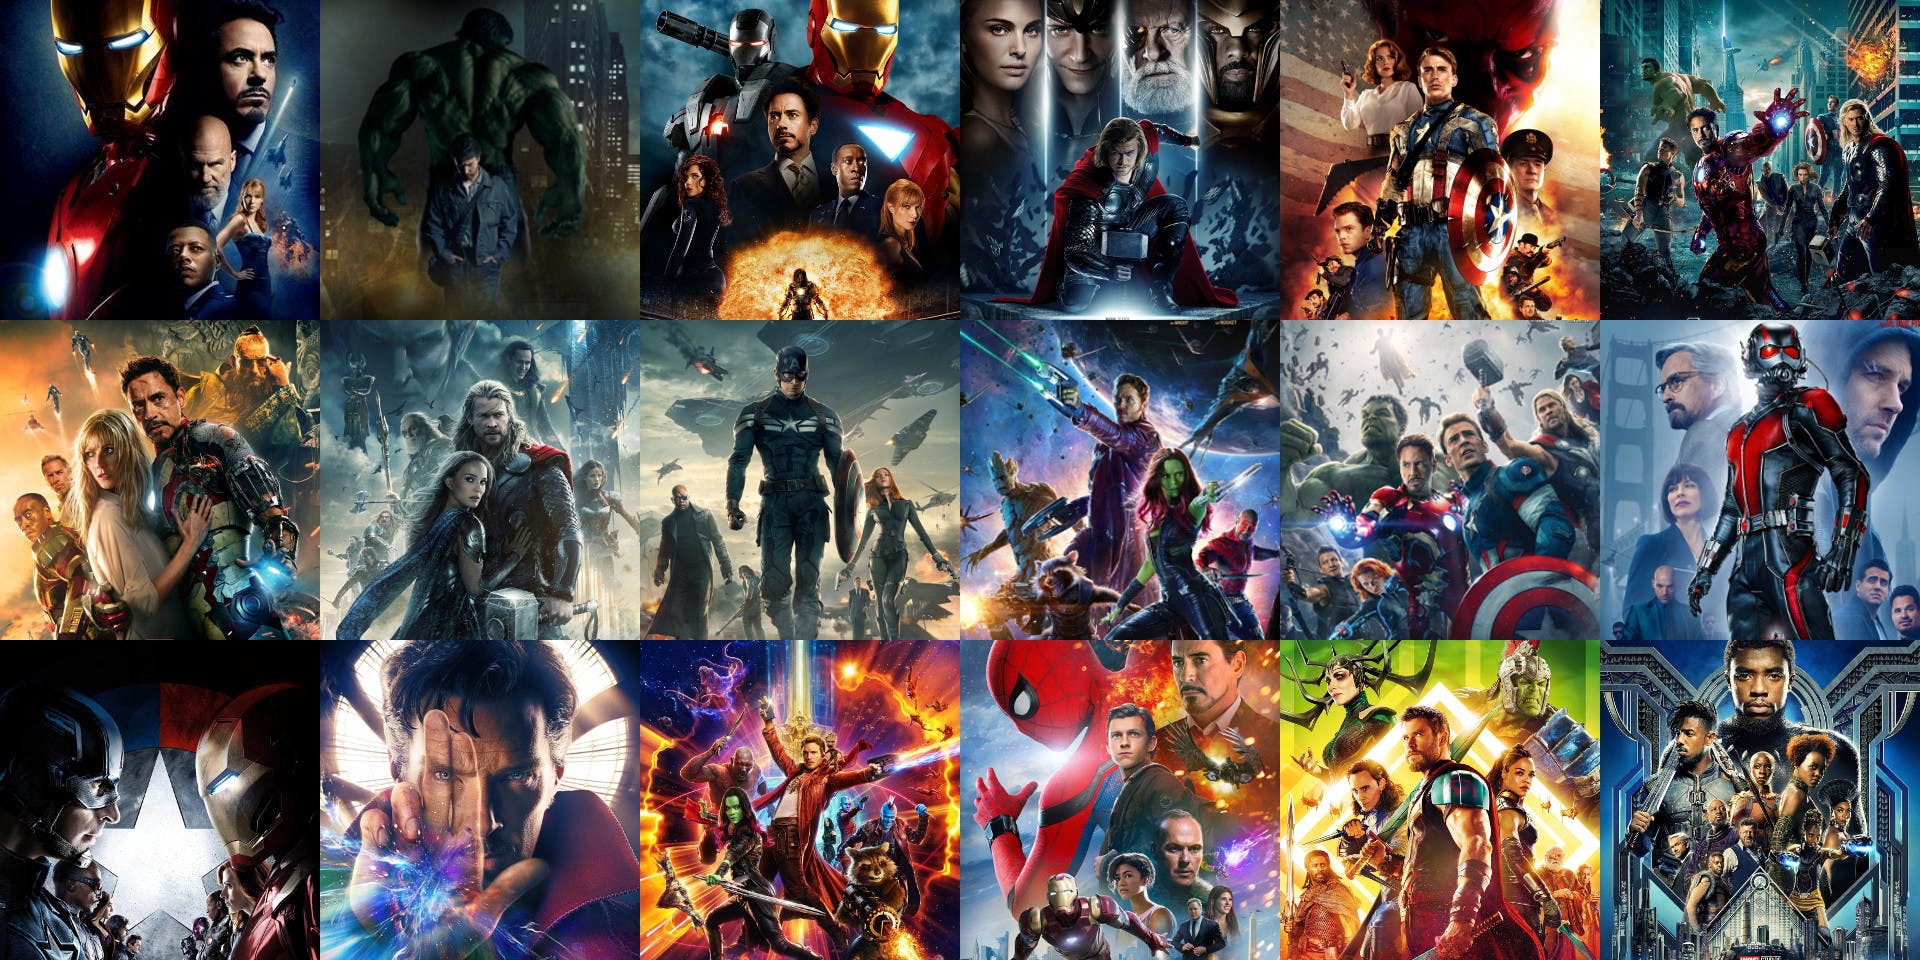

" 
Perform EDA on 1000 movies data as a completion criteria for INSAID GCD course - Term 1.
"
<a id=section101></a> 
### 1.1. Introduction
Being a movie buff, I have selected this data set to provide some insights into the movie 
This dataset is a collection of details about the 1000 movies released in between 2006 - 2016.
My aim is to derive some insights about the movies that broke all barriers and created records (both ways :) )

<a id=section102></a> 
### 1.2. Data source and dataset

Provided by INSAID.
Can be downloaded from the below link:
https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv

<a id=section2></a> 
### 2. Load the packages and data 

In [205]:
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                   
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', 100)                                      

movies = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")       

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [206]:
movies.dtypes                                                                       

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

<a id=section302></a> 

In [207]:
movies.head()                                                                      

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section303><a/>

In [208]:
movies.describe() 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [209]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [210]:
movies[['Year', 'Rating', 'Runtime (Minutes)', 'Revenue (Millions)', 'Metascore']].describe()                                                    # Descriptive statistics for the numerical variables

,Year,Rating,Runtime (Minutes),Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,872.000000,936.000000
mean,2012.783000,6.723200,113.172000,82.956376,58.985043
std,3.205962,0.945429,18.810908,103.253540,17.194757
min,2006.000000,1.900000,66.000000,0.000000,11.000000
25%,2010.000000,6.200000,100.000000,13.270000,47.000000
50%,2014.000000,6.800000,111.000000,47.985000,59.500000
75%,2016.000000,7.400000,123.000000,113.715000,72.000000
max,2016.000000,9.000000,191.000000,936.630000,100.000000


In [211]:
movies.describe(include = 'all')   

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","Tells the story of Benjamin Button, a man who ...",Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


#### Observations
The revenue and metascore details are missing for a lot of movies.
Need to exclude these movies from interpretation involving those columns.
Also, the unique value count for Title column seems to be one short of the total count indicating that there are two movies with the same name.


<a id=section304></a> 

In [212]:
movies.sample(10)                                                                  # Display a random 10 rows from the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
316,317,The 5th Wave,"Action,Adventure,Sci-Fi",Four waves of increasingly deadly alien attack...,J Blakeson,"Chloë Grace Moretz, Matthew Zuk, Gabriela Lope...",2016,112,5.2,73093,34.91,33.0
946,947,The Butler,"Biography,Drama",As Cecil Gaines serves eight presidents during...,Lee Daniels,"Forest Whitaker, Oprah Winfrey, John Cusack, J...",2013,132,7.2,93322,116.63,NaN
15,16,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0
596,597,Never Back Down,"Action,Drama,Sport",A frustrated and conflicted teenager arrives a...,Jeff Wadlow,"Sean Faris, Djimon Hounsou, Amber Heard, Cam G...",2008,110,6.6,84083,24.85,39.0
200,201,Edge of Tomorrow,"Action,Adventure,Sci-Fi",A soldier fighting aliens gets to relive the s...,Doug Liman,"Tom Cruise, Emily Blunt, Bill Paxton, Brendan ...",2014,113,7.9,471815,100.19,71.0
157,158,"Crazy, Stupid, Love.","Comedy,Drama,Romance",A middle-aged husband's life changes dramatica...,Glenn Ficarra,"Steve Carell, Ryan Gosling, Julianne Moore, Em...",2011,118,7.4,396714,84.24,68.0
446,447,Dredd,"Action,Sci-Fi","In a violent, futuristic city where the police...",Pete Travis,"Karl Urban, Olivia Thirlby, Lena Headey, Rache...",2012,95,7.1,213764,13.40,59.0
160,161,Mine,"Thriller,War","After a failed assassination attempt, a soldie...",Fabio Guaglione,"Armie Hammer, Annabelle Wallis,Tom Cullen, Cli...",2016,106,6.0,5926,NaN,40.0
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
661,662,The First Time,"Comedy,Drama,Romance",A shy senior and a down-to-earth junior fall i...,Jon Kasdan,"Dylan O'Brien, Britt Robertson, Victoria Justi...",2012,95,6.9,54027,0.02,55.0


<a id=section305><a/>

In [213]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="Movies_profile_initial.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Metascore, Rank, Rating, Revenue, Runtime, Votes and Year</strong> 
 - <em>Categorical</em>: <strong>Title, Description, Actors, Director and Genre</strong>
- <strong>Genre</strong> has 207 distinct responses. This is because the movies might be falling into multiple Genres. 
- <strong>Actors</strong> is a collection of main actors of the movie.
- <strong>Rating</strong> Rating between 1 to 10.
- The following variables have null values that may need to addressed.
 - <strong>Revenue (Millions)</strong>:  There are 128 missing values. It might be for several reasons that the data is not available. Maybe the movie didnt collect any revenue
 - <strong>Metascore</strong>: There are 64 missing values.  "Movies will get a Metascore only if at least four critics's reviews are collected. Metascore is considered the rating of a film." So, it is very much possible that these movies were not reviewed by that many critics. So this seems to be an optional column or just critic rating.


<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
    - Standardize all column headers to lower case (to prevent typos!)
    - Rename 'Revenue (Millions)' and 'Runtime (Minutes)' to something simpler.
    - Split Actors and Genres to multiple columns
    - It will be important to decide how to handle NaN values for Revenue.


<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

### 4.1. Standardize all column headers to lower case 

In [214]:
movies.columns = map(str.lower, movies.columns)                                 
movies.dtypes                                                                

rank                    int64
title                  object
genre                  object
description            object
director               object
actors                 object
year                    int64
runtime (minutes)       int64
rating                float64
votes                   int64
revenue (millions)    float64
metascore             float64
dtype: object

<a id=section402></a> 
### 4.2. Rename columns

In [215]:
movies = movies.rename(columns = {'runtime (minutes)':'runtime'})
movies = movies.rename(columns = {'revenue (millions)':'revenue'})
movies.dtypes 

rank             int64
title           object
genre           object
description     object
director        object
actors          object
year             int64
runtime          int64
rating         float64
votes            int64
revenue        float64
metascore      float64
dtype: object

<a id=section403></a>
### 4.3. Missing Data and its imputation

In [216]:
#missing data
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

             Total  Percent
revenue        128    0.128
metascore       64    0.064
votes            0    0.000
rating           0    0.000
runtime          0    0.000
year             0    0.000
actors           0    0.000
director         0    0.000
description      0    0.000
genre            0    0.000
title            0    0.000
rank             0    0.000


In [217]:
actors_df = movies['actors'].str.split(',', expand=True).rename(columns=lambda x: f"actor_{x+1}")
movies = pd.concat([movies, actors_df], axis=1, sort=False)
genre_df = movies['genre'].str.split(',', expand=True).rename(columns=lambda x: f"genre_{x+1}")
movies = pd.concat([movies, genre_df], axis=1, sort=False)
movies

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,actor_1,actor_2,actor_3,actor_4,genre_1,genre_2,genre_3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie,Viola Davis,Action,Adventure,Fantasy
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,Action,Adventure,Fantasy
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,Comedy,Drama,Music
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,Comedy,None,None
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,Action,Adventure,Biography
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne,Adventure,Drama,Romance


In [218]:
# dealing with missing data
# We cant remove the revenue field as it would provide very important insights.
# So, we have to live with it.
# Dropping the description, genre and actors fields for simplicity.
movies = movies.drop(['description'], axis= 1)
movies = movies.drop(['actors'], axis= 1)
movies = movies.drop(['genre'], axis= 1)
movies.head(5)

,rank,title,director,year,runtime,rating,votes,revenue,metascore,actor_1,actor_2,actor_3,actor_4,genre_1,genre_2,genre_3
0,1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,Action,Adventure,Sci-Fi
1,2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,Adventure,Mystery,Sci-Fi
2,3,Split,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,Horror,Thriller,None
3,4,Sing,Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,Animation,Comedy,Family
4,5,Suicide Squad,David Ayer,2016,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie,Viola Davis,Action,Adventure,Fantasy


<a id=section404></a> 
### 4.4. Grouping
#### Genre Distribution

Group the movies based on their Genre for analysis.

In [219]:
unique_genres = pd.concat([movies['genre_1'], movies['genre_2'], movies['genre_3']]).unique()
unique_genres = unique_genres[unique_genres != None]
print (unique_genres)
print (len(unique_genres))


['Action' 'Adventure' 'Horror' 'Animation' 'Comedy' 'Biography' 'Drama'
 'Crime' 'Romance' 'Mystery' 'Thriller' 'Sci-Fi' 'Fantasy' 'Family'
 'History' 'Music' 'Western' 'War' 'Musical' 'Sport']
20


### Genre distribution of the sample

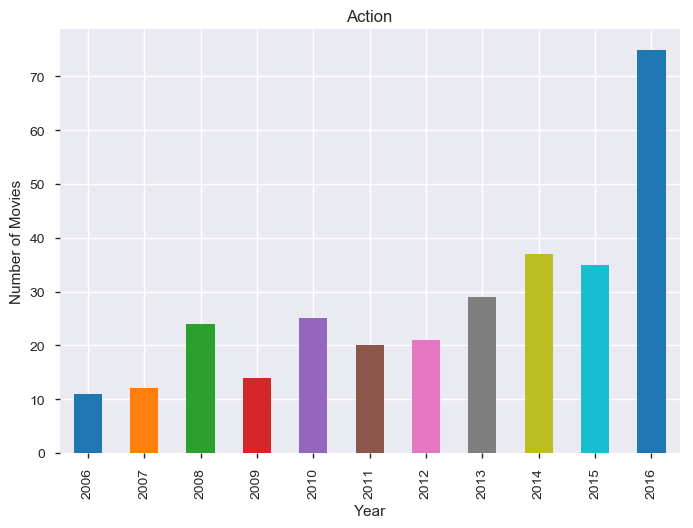

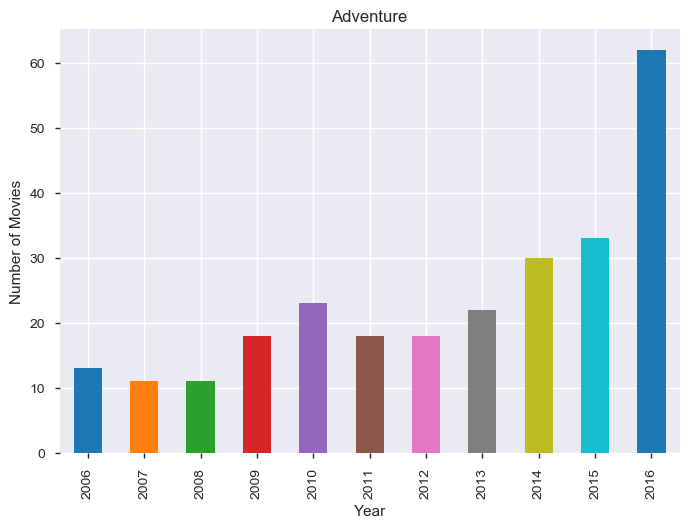

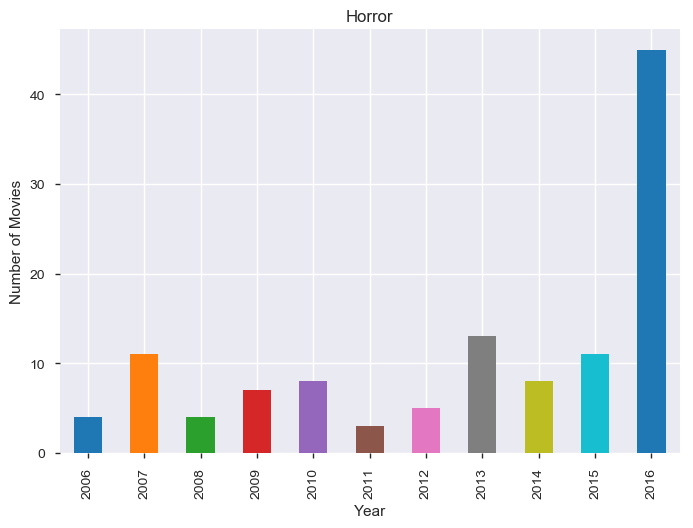

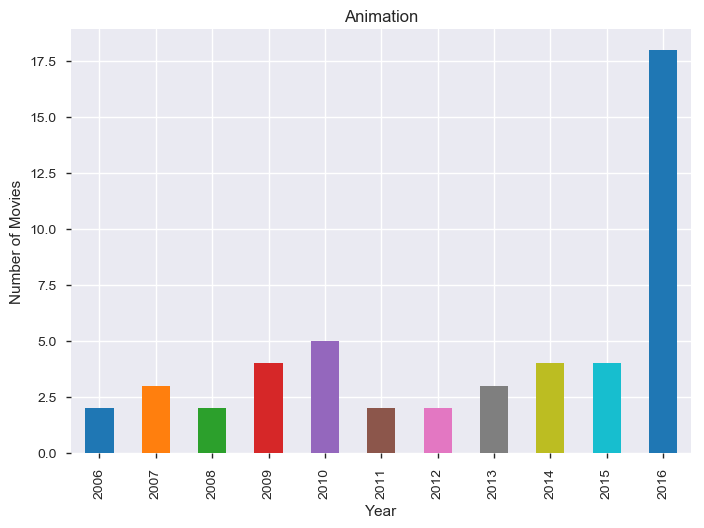

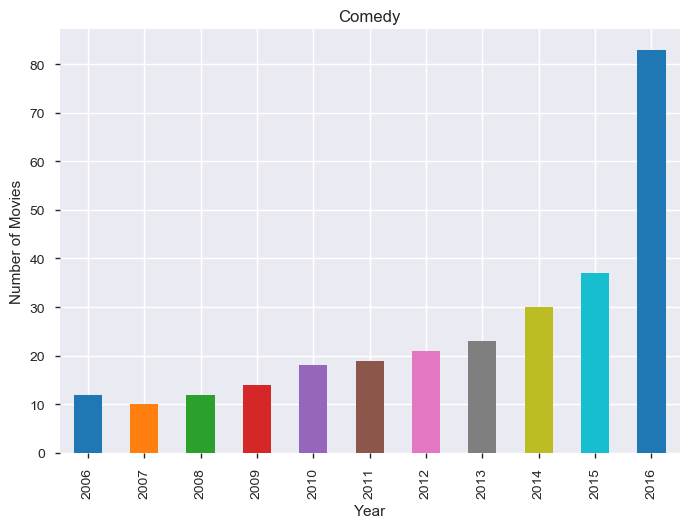

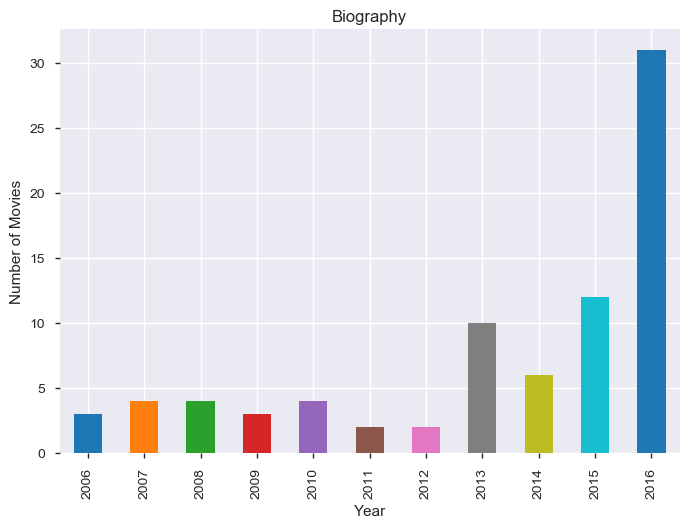

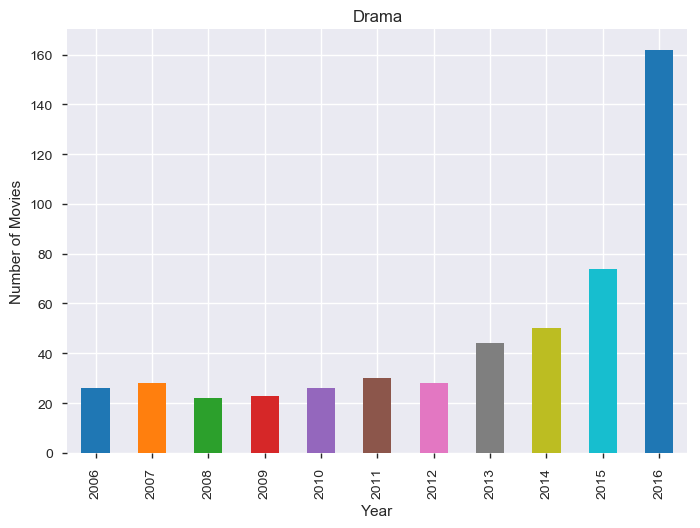

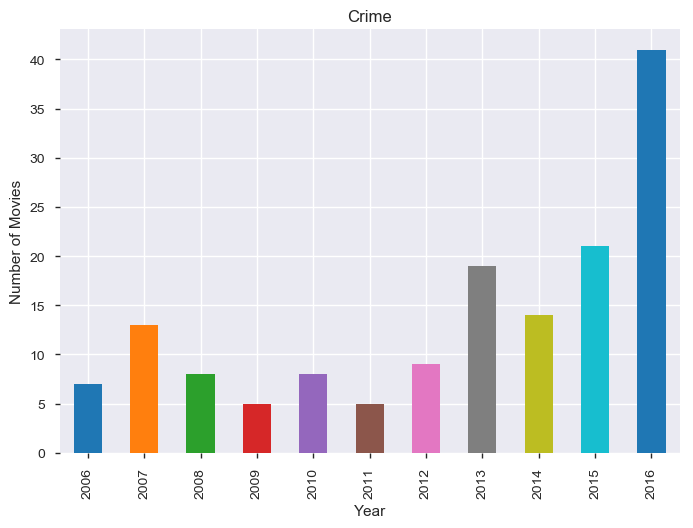

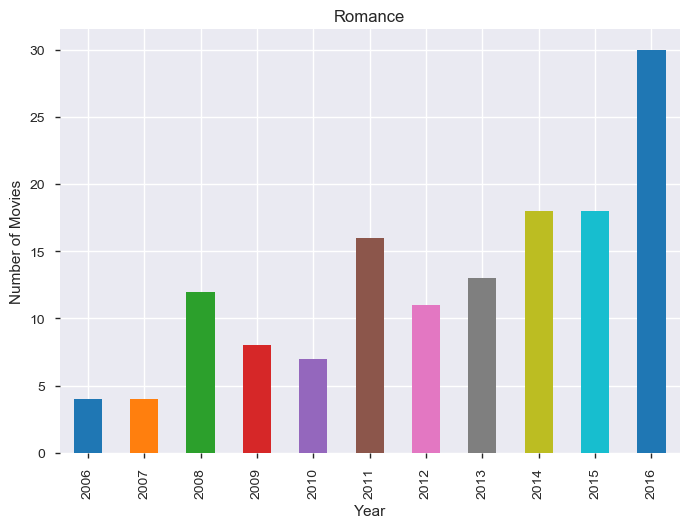

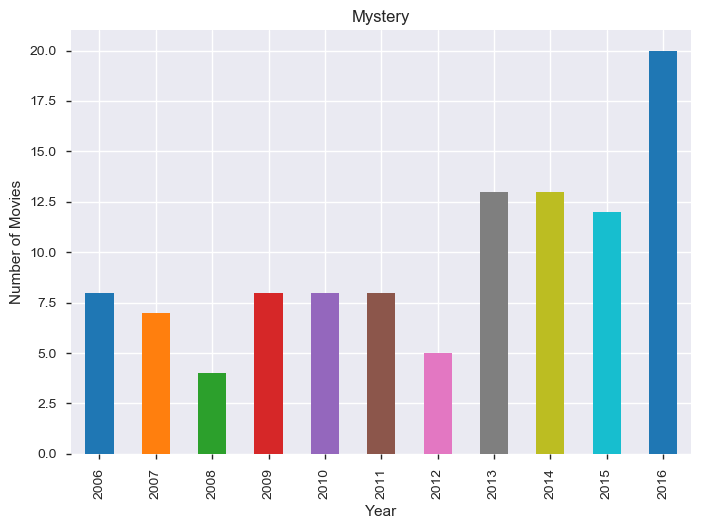

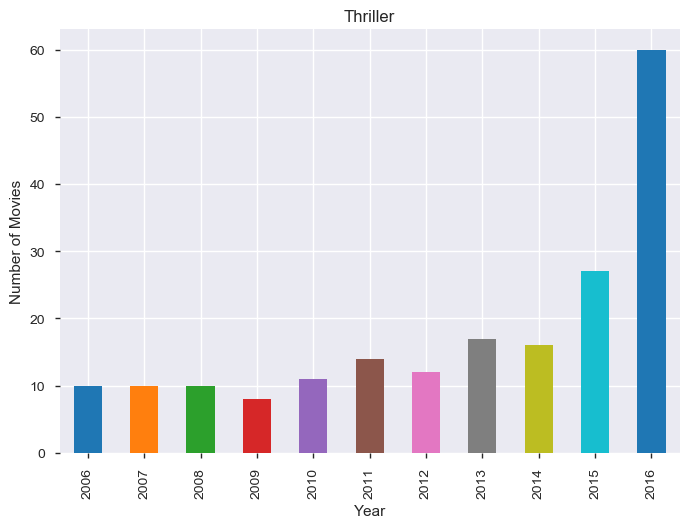

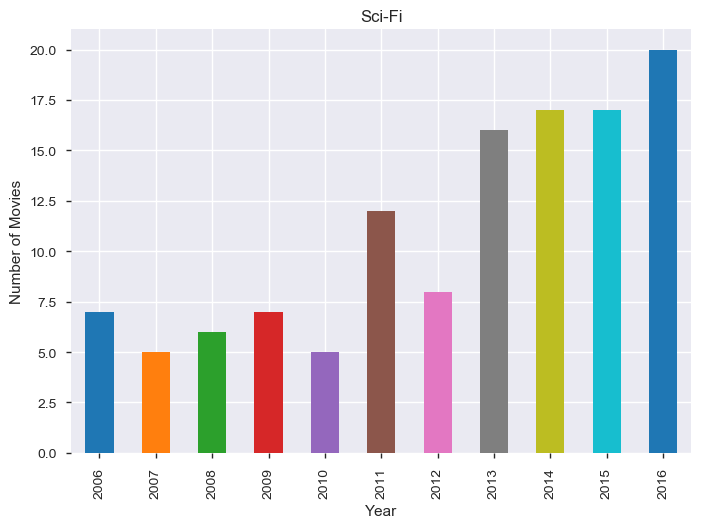

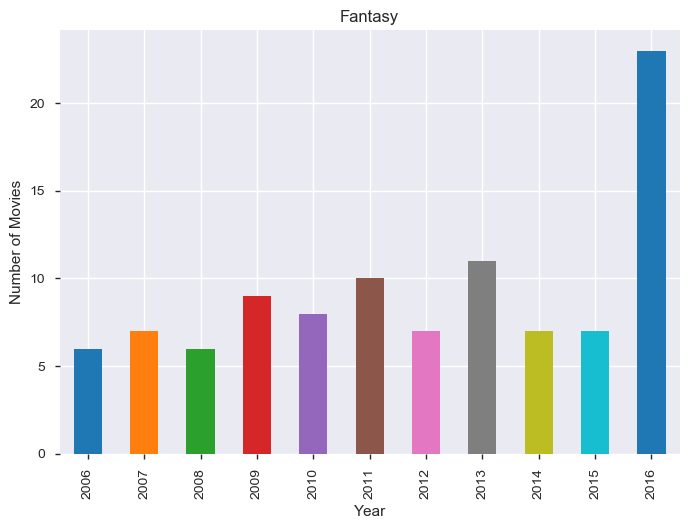

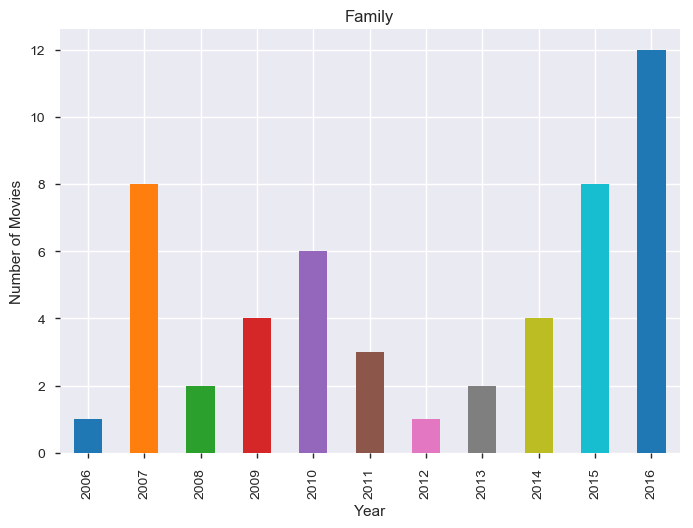

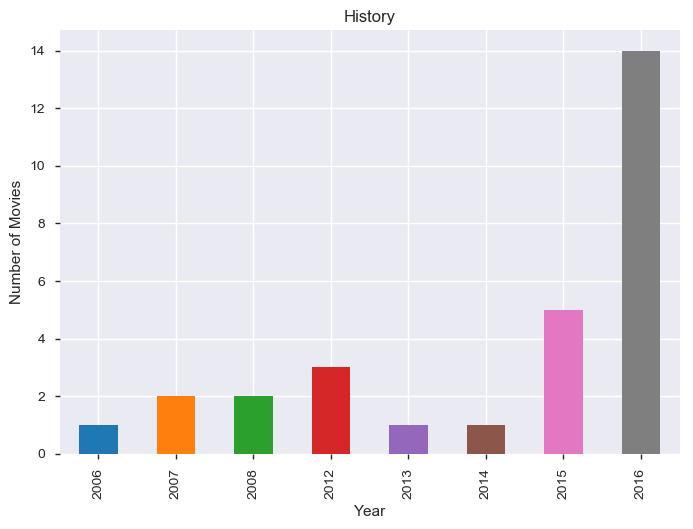

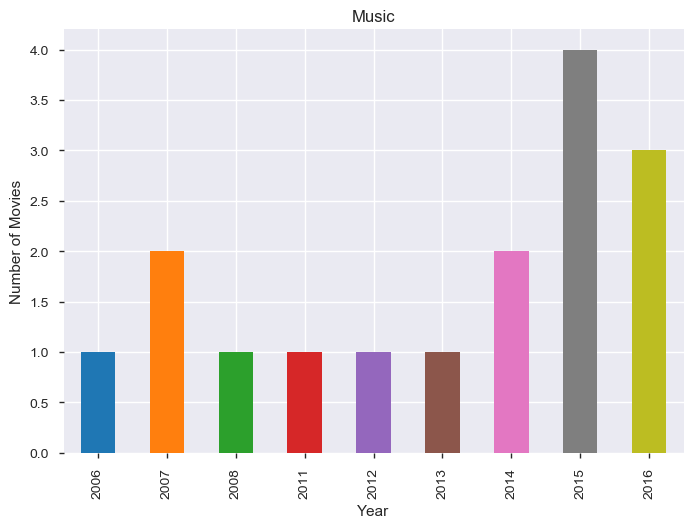

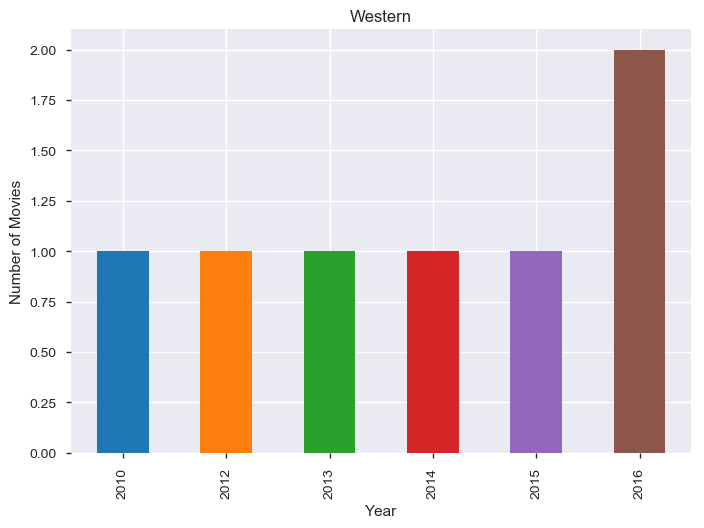

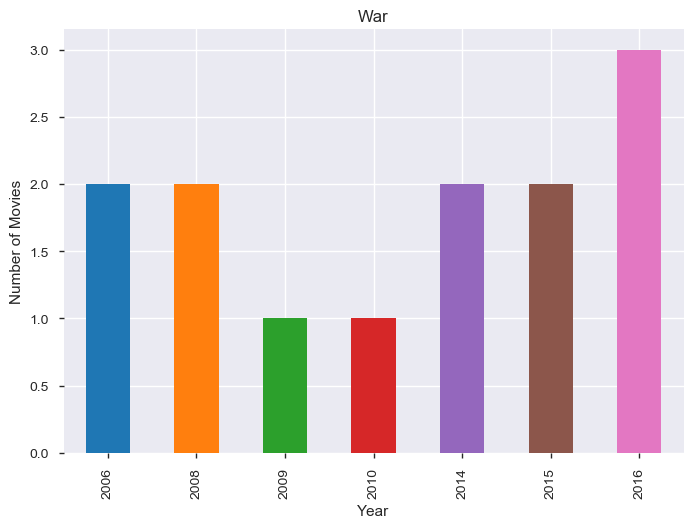

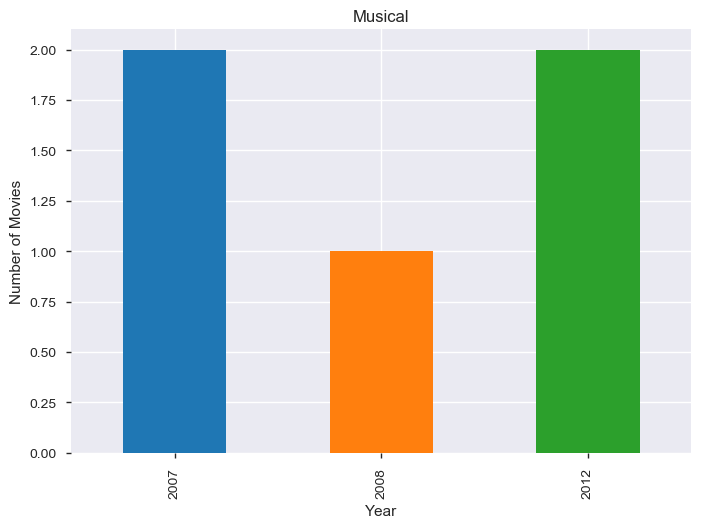

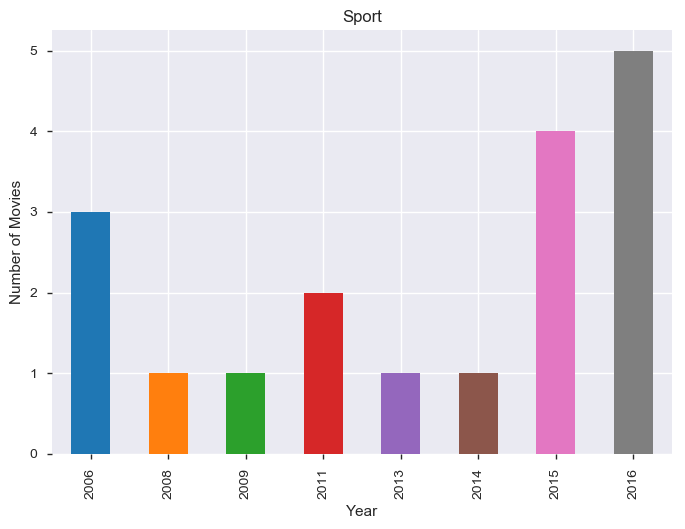

In [220]:
#print('Number of movies in each genre: \n')
genre_movieCount = np.zeros(len(list(unique_genres)))
i = 0
for genre in unique_genres:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(str(genre))
    movies[current_genre].year.value_counts().sort_index().plot.bar()
    # print(genre, len(movies[current_genre]))
    genre_movieCount[i] = len(movies[current_genre])
    i += 1
    

In [221]:
print (genre_movieCount)

genre_df = pd.DataFrame(genre_movieCount, index=unique_genres, columns=['MovieCount'])
genre_df

[303. 259. 119.  49. 279.  81. 513. 150. 141. 106. 195. 120. 101.  51.
  29.  16.   7.  13.   5.  18.]


,MovieCount
Action,303.0
Adventure,259.0
Horror,119.0
Animation,49.0
Comedy,279.0
Biography,81.0
Drama,513.0
Crime,150.0
Romance,141.0
Mystery,106.0


Text(0.5,1,'Total Movies - Top 5 Genres')

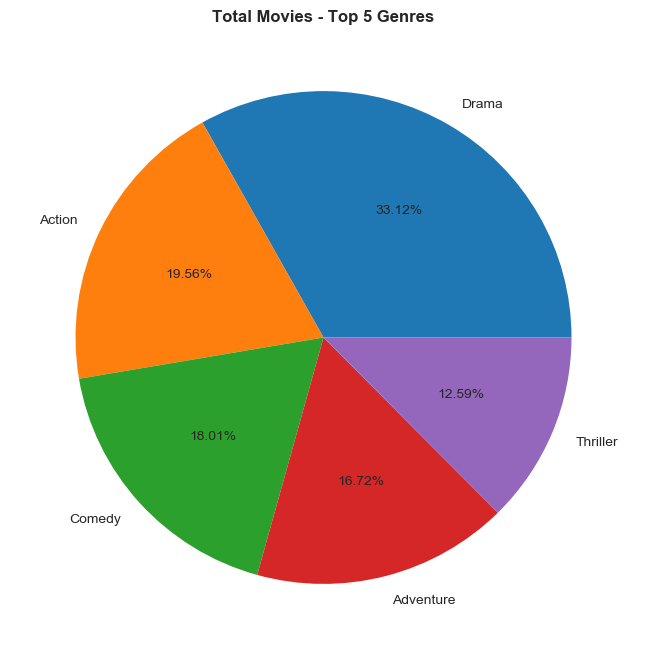

In [222]:
genre_df.sort_values(by='MovieCount', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Top 5 Genres', weight='bold')

Text(0.5,1,'Total Movies - Bottom 5 Genres')

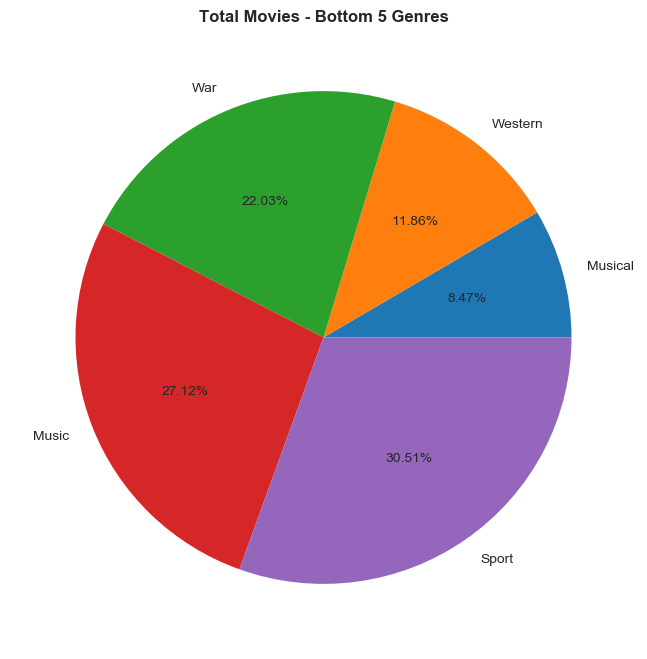

In [223]:
genre_df.sort_values(by='MovieCount', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Bottom 5 Genres', weight='bold')

#### Question that comes up:
- How does genre relate to revenue?

In [224]:
genre_revenue = np.zeros(len(unique_genres))
i = 0
for genre in unique_genres:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    genre_revenue[i] = movies[current_genre].xs('revenue', axis=1).sum() / movies['revenue'].sum() * 100
    i += 1

genre_revenue_df = pd.DataFrame(genre_revenue, index=unique_genres, columns=['Revenue Share'])
genre_revenue_df

,Revenue Share
Action,49.220935
Adventure,53.709850
Horror,4.718947
Animation,12.424321
Comedy,26.703062
Biography,5.785510
Drama,30.318038
Crime,11.107059
Romance,7.579547
Mystery,6.721036


Text(0.5,1,'Revenue Share - Top 5 Genres')

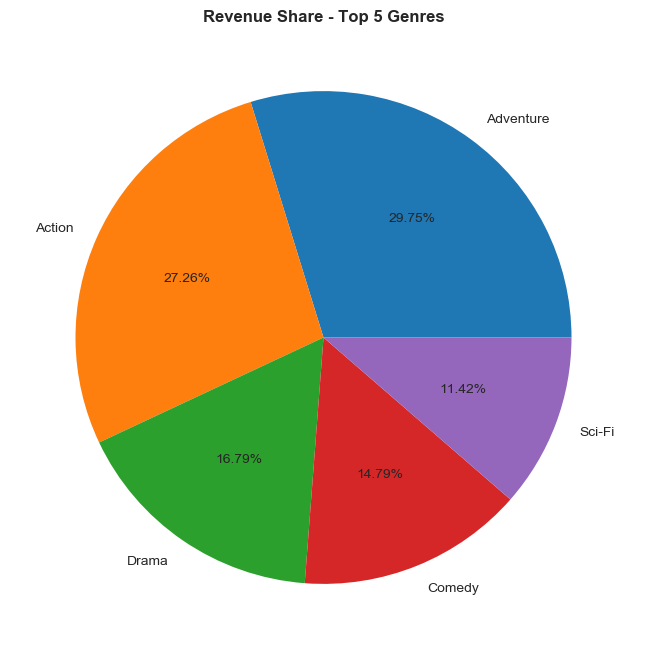

In [225]:
genre_revenue_df.sort_values(by='Revenue Share', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue Share - Top 5 Genres', weight='bold')

Text(0.5,1,'Revenue Share - Bottom 5 Genres')

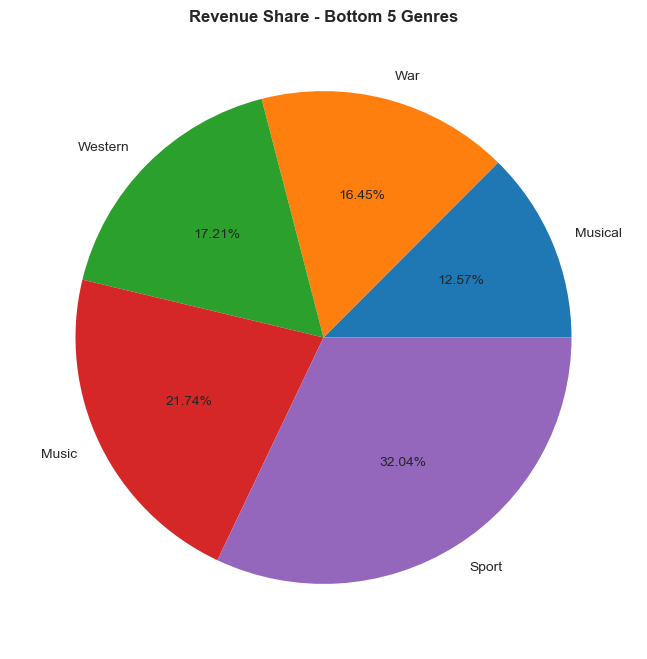

In [226]:
genre_revenue_df.sort_values(by='Revenue Share', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue Share - Bottom 5 Genres', weight='bold')

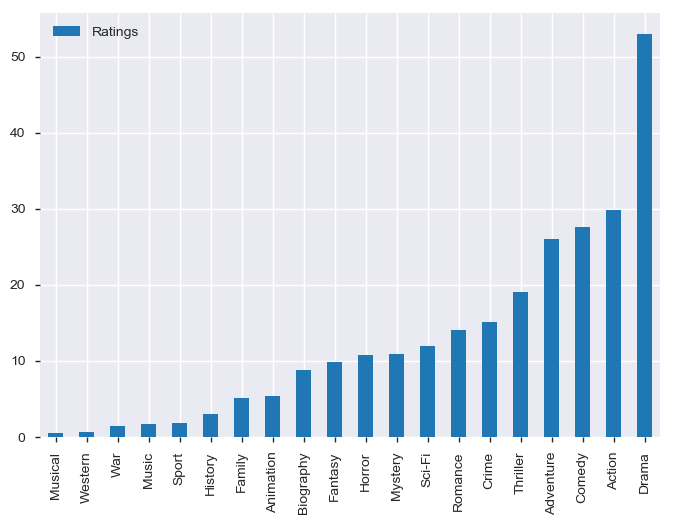

In [227]:
genre_ratings = np.zeros(len(list(unique_genres)))
i = 0
for genre in unique_genres:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    genre_ratings[i] = movies[current_genre].xs('rating', axis=1).sum() / movies['rating'].sum() * 100
    i += 1
genre_ratings_df = pd.DataFrame(genre_ratings, index=unique_genres, columns=['Ratings'])
genre_ratings_df.sort_index(by='Ratings').plot.bar()

#### Observations
As there are multiple genres associated with each movie, it is not possible to decide which genre is having more market share but clearly Adventure and Action movies are having a good market at the box office.
They are followed by Drama, Comedy and Sci-Fi movies.

But when it comes to the number of movies that were made during the period, the highest number of movies were made in the Drama genre followed by action and comedy.

Also, the least favorite genres are Musical, Western and War.
As the number of movies made in these genres are less, their collections are also correpondingly low.

Over the years, the ratings received by movies in Drama genre is much higher compared to Adventure, Action or Comedy.


#### Pandas profiling post data manipulation

In [228]:
post_profile = pandas_profiling.ProfileReport(movies)
post_profile.to_file(outputfile="Movies_profile_postProfiling.html")

#### Create a copy of "movies" dataframe for Label encoding

In [229]:
movies_new = movies.copy(deep=True)

#### Dealing with Categorical Variables

In [230]:
from sklearn.preprocessing import LabelEncoder                                    
number = LabelEncoder()                                                           
for i in movies_new.columns:                                                          
    movies_new[i] = number.fit_transform(movies_new[i].astype('str'))

In [231]:
movies_new

,rank,title,director,year,runtime,rating,votes,revenue,metascore,actor_1,actor_2,actor_3,actor_4,genre_1,genre_2,genre_3
0,0,287,265,8,21,47,893,463,61,94,666,99,597,0,1,14
1,112,568,518,6,24,36,701,135,50,391,412,516,105,1,12,14
2,223,655,391,10,17,39,191,167,47,221,51,274,279,8,17,12
3,334,635,105,10,8,38,804,387,44,347,691,667,520,2,3,5
4,445,673,136,10,23,28,617,456,25,514,274,478,582,0,1,6
5,556,779,640,10,3,27,773,567,27,345,644,749,38,0,1,6
6,667,402,122,10,28,49,419,205,78,437,196,633,237,4,5,9
7,778,470,558,10,83,30,401,814,56,160,30,397,764,4,13,12
8,889,832,264,10,41,37,868,747,63,85,559,674,570,0,1,1
9,1,538,448,10,16,36,272,69,26,240,121,523,771,1,5,13


<a id=section406><a/>

#### Correlation of Features

In [232]:
corr=movies_new.corr()['rank']
corr[np.argsort(corr,axis=0)[::-1]]

rank         1.000000
genre_1      0.114268
actor_1      0.089588
genre_2      0.080866
revenue      0.075228
runtime      0.062713
title        0.037851
director     0.036205
genre_3      0.033176
actor_3      0.024030
actor_4      0.001435
actor_2     -0.032162
votes       -0.048850
metascore   -0.124285
rating      -0.159026
year        -0.184708
Name: rank, dtype: float64

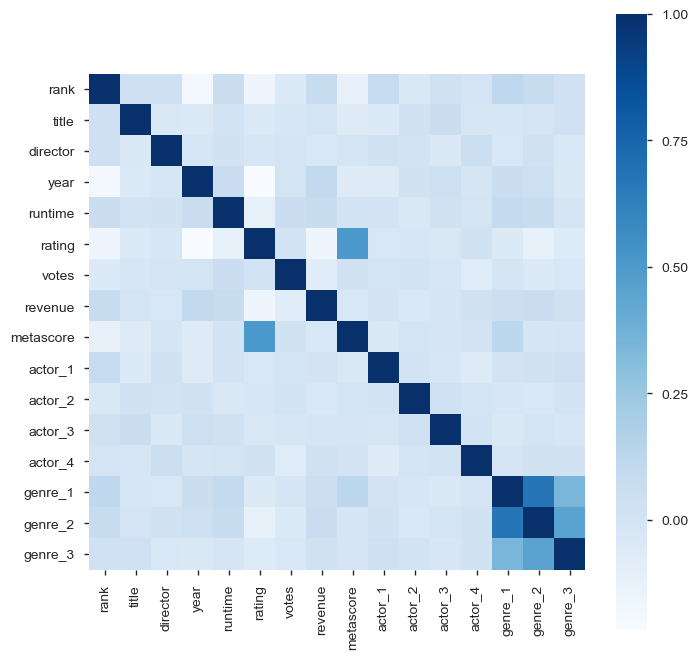

In [233]:
features_correlation = movies_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observations

- rating and metascore are highly corelated.
- Also, for the movies falling under multipe Genres, the individual genres have good corelation.
- But as such the remaining factors have very weak corelation.
- Interesting factor to note is that the revenue and rating have no corelation.

<a id=section5><a/>

### 5. Identify patterns in the data

<a id=section501><a/>

<a id=section501></a> 
### 5.1. Movies produced per year

Text(0.5,1,'Movie Count by Year')

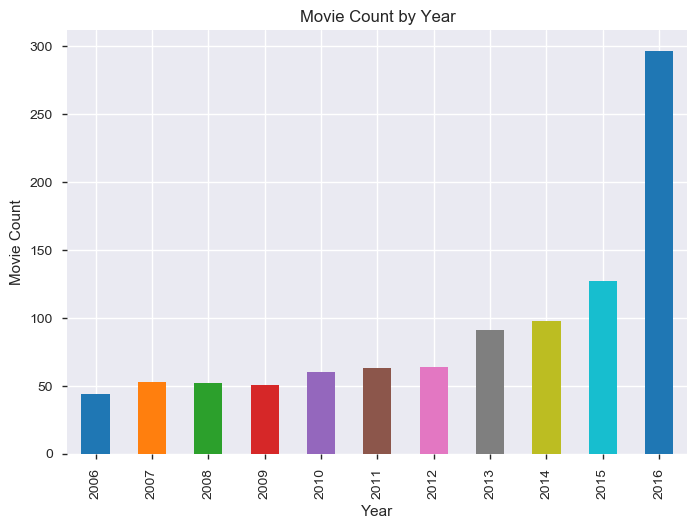

In [234]:
movie_yearly_count = movies['year'].value_counts().sort_index().plot.bar()
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

## Observation

The number of movies almost doubled from 2015 to 2016.
Till 2013, the number of movies made was around 50 but the trend started changing from 2013.

<a id=section502></a> 
### 5.2. Correlation between rating and revenue

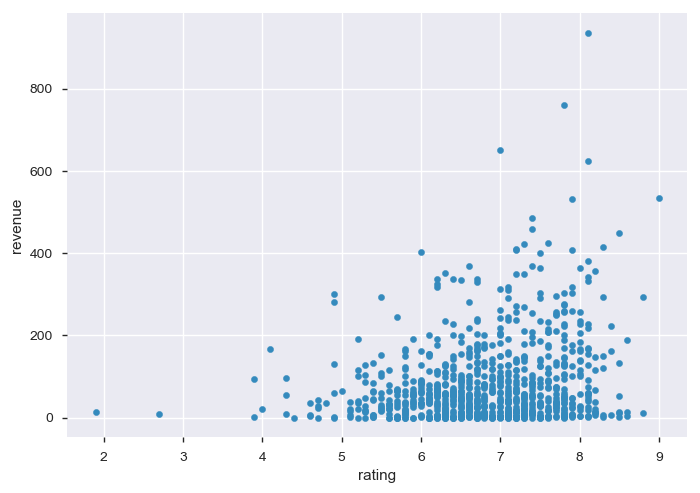

In [235]:
movies.plot.scatter(x='rating', y = 'revenue')

In [236]:
df = pd.DataFrame({'Rating': movies['rating'], 'Revenue': movies['revenue']}) 

print("Pearson:", df.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:            Rating   Revenue
Rating   1.000000  0.217654
Revenue  0.217654  1.000000



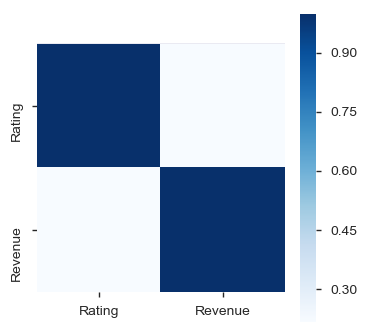

In [237]:
features = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

<a id=section502><a/>

<a id=section503></a> 
### 5.3. Correlation between rating and metascore

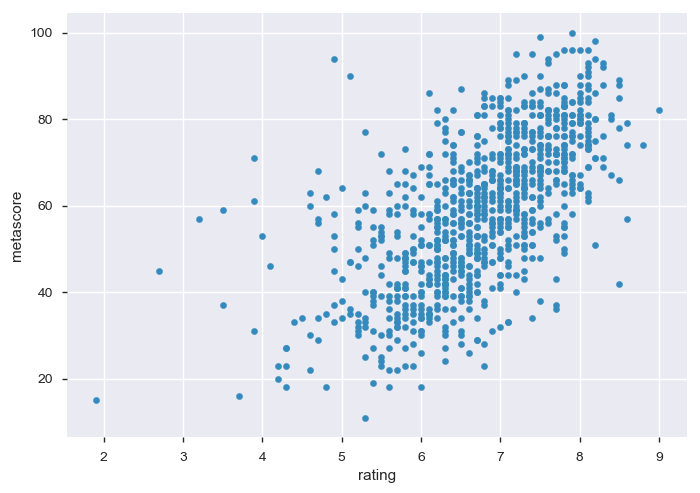

In [238]:
movies.plot.scatter(x='rating', y = 'metascore')

In [239]:
df = pd.DataFrame({'Rating': movies['rating'], 'Metascore': movies['metascore']}) 

print("Pearson:", df.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:              Rating  Metascore
Rating     1.000000   0.631897
Metascore  0.631897   1.000000



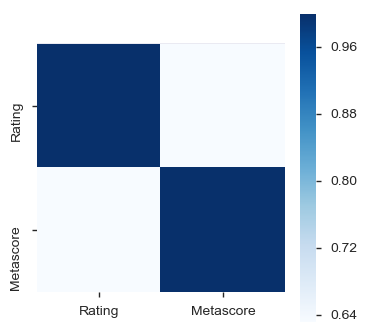

In [240]:
features = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

<a id=section503><a/>

<a id=section504></a> 
### 5.4. Rating level of movies

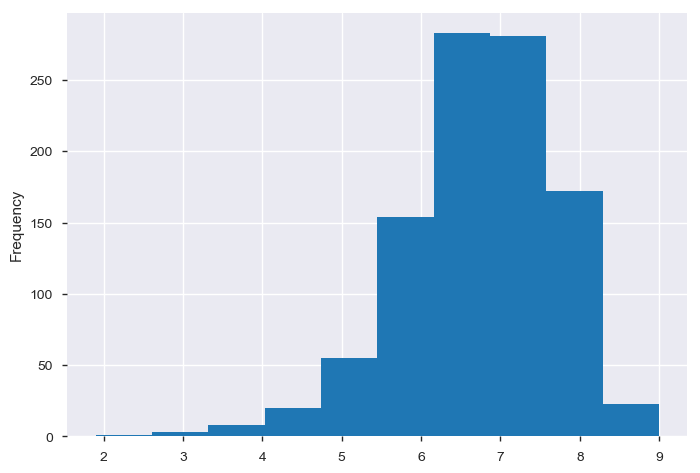

In [241]:
movies['rating'].plot.hist()

### Observation
Majority of the movies have rating between 6 - 8 (Average good movies)

<a id=section505></a> 
### 5.5. Genre wise Movie comparison

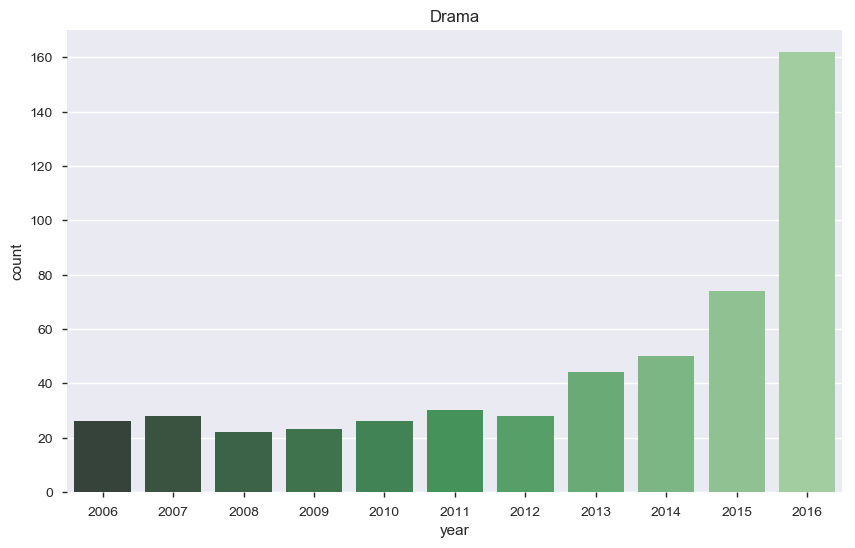

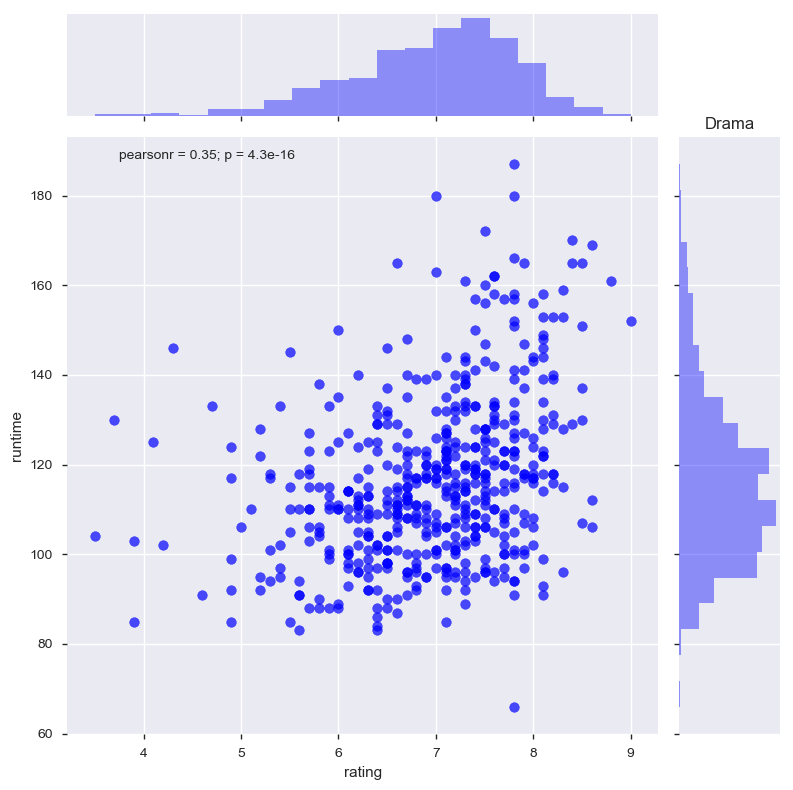

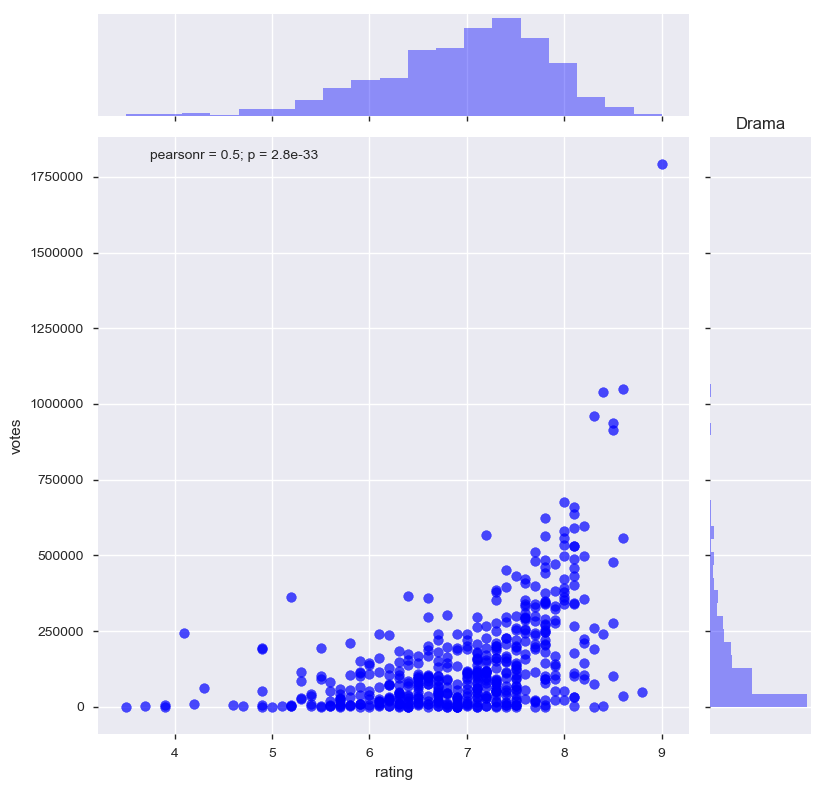

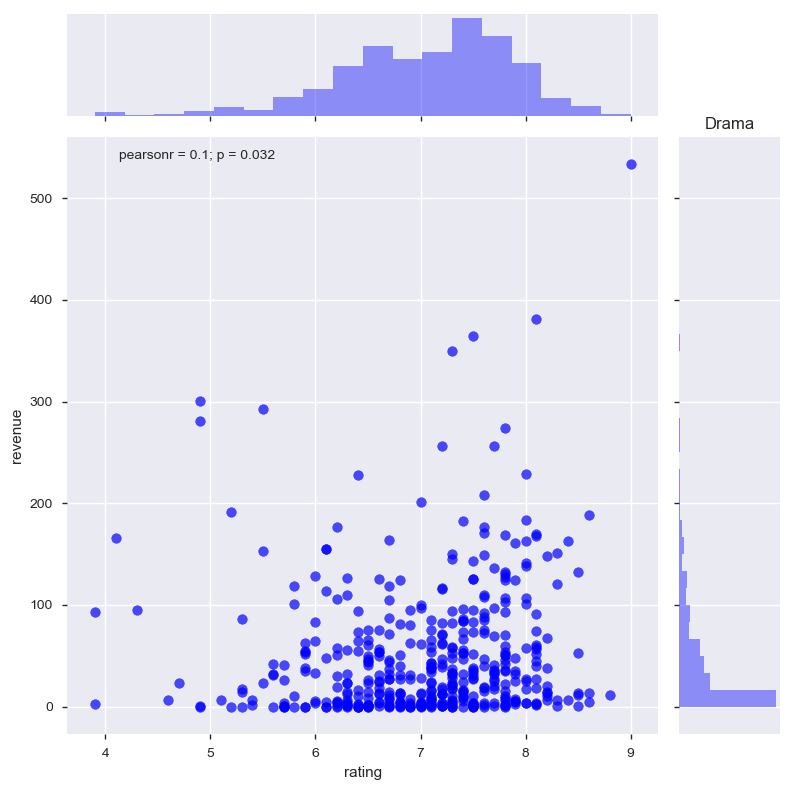

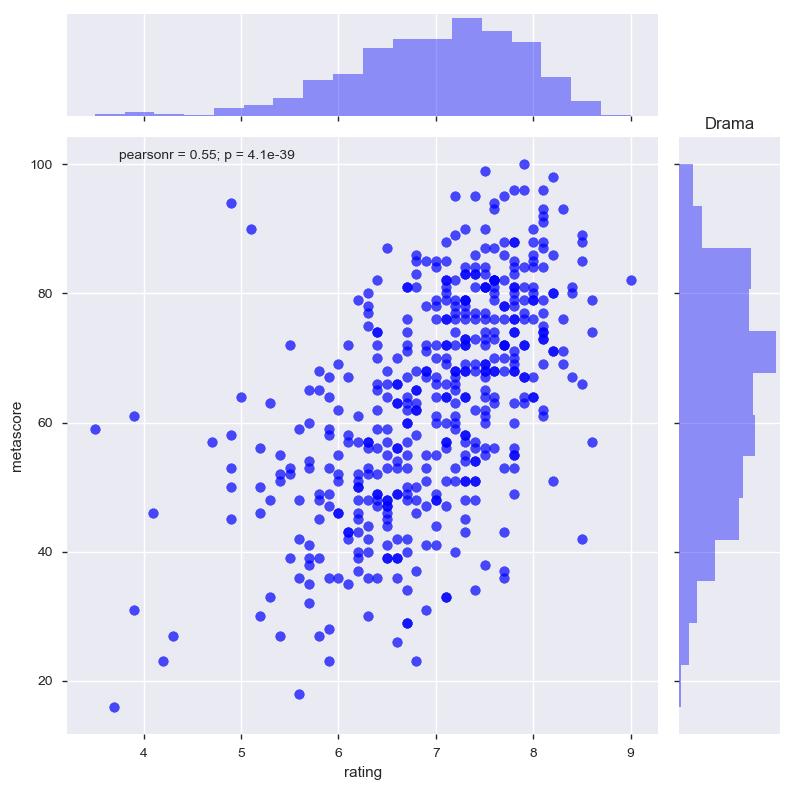

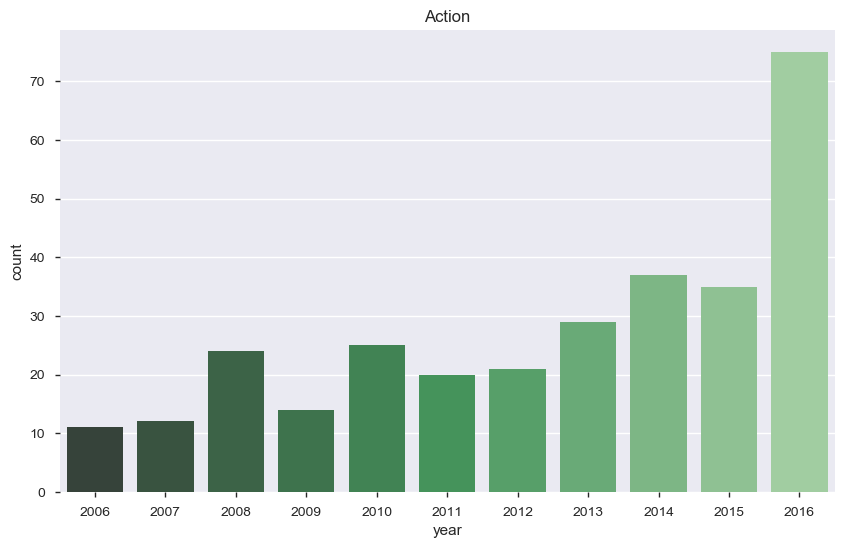

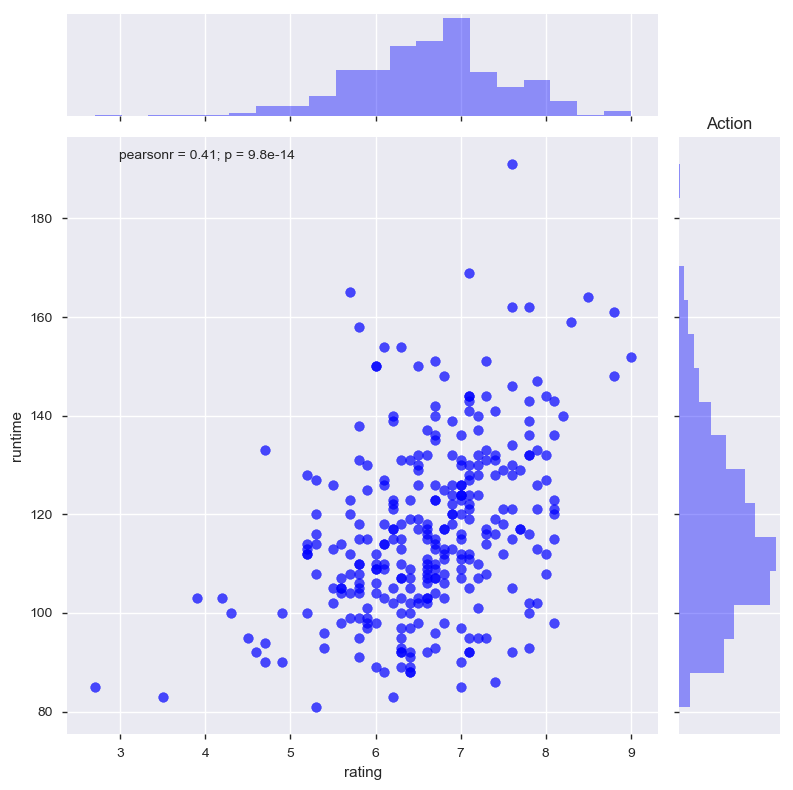

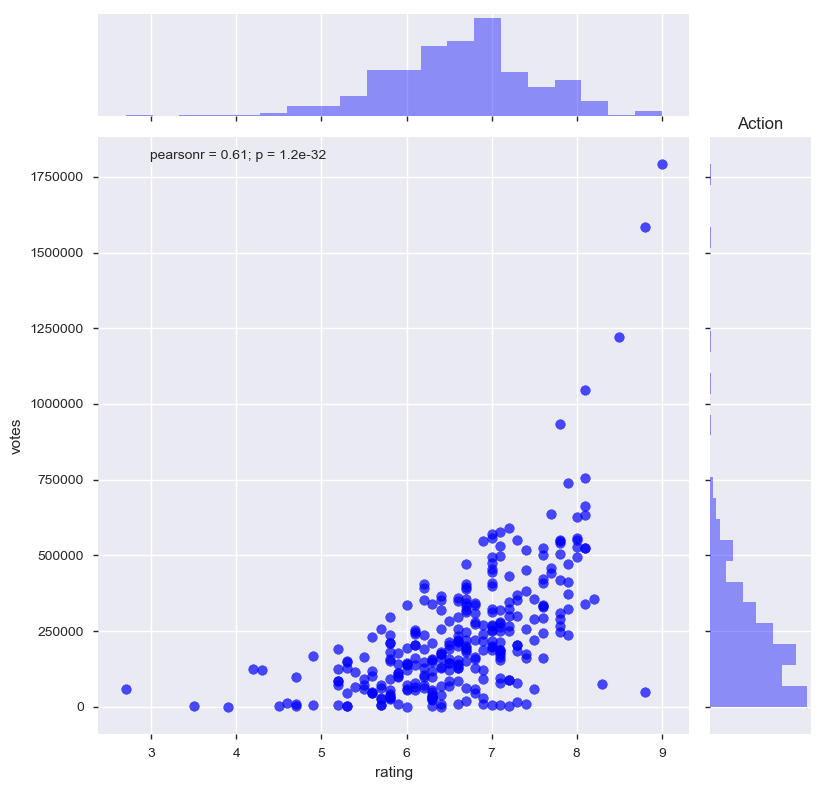

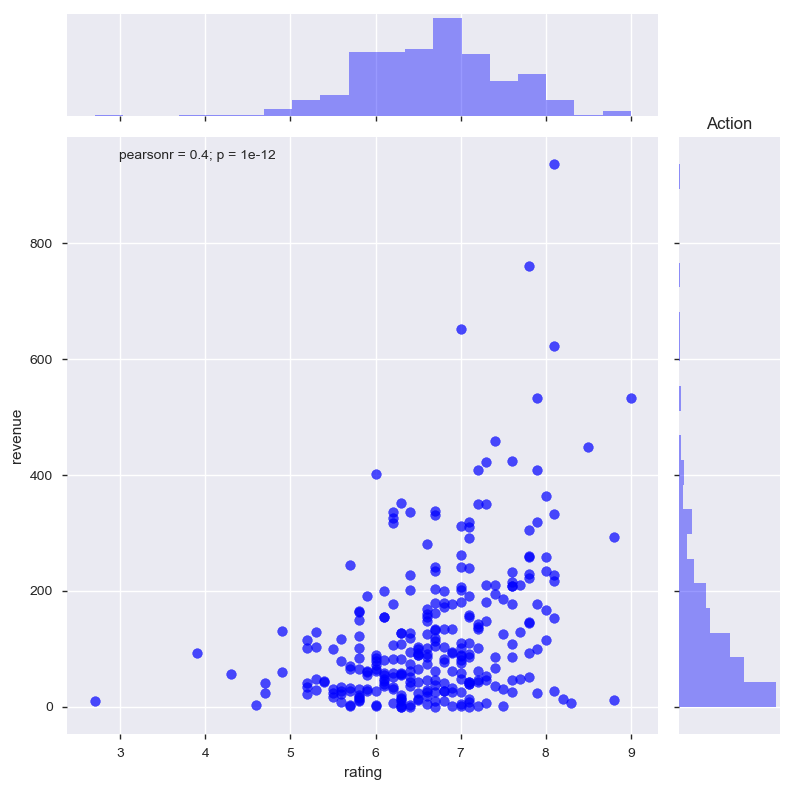

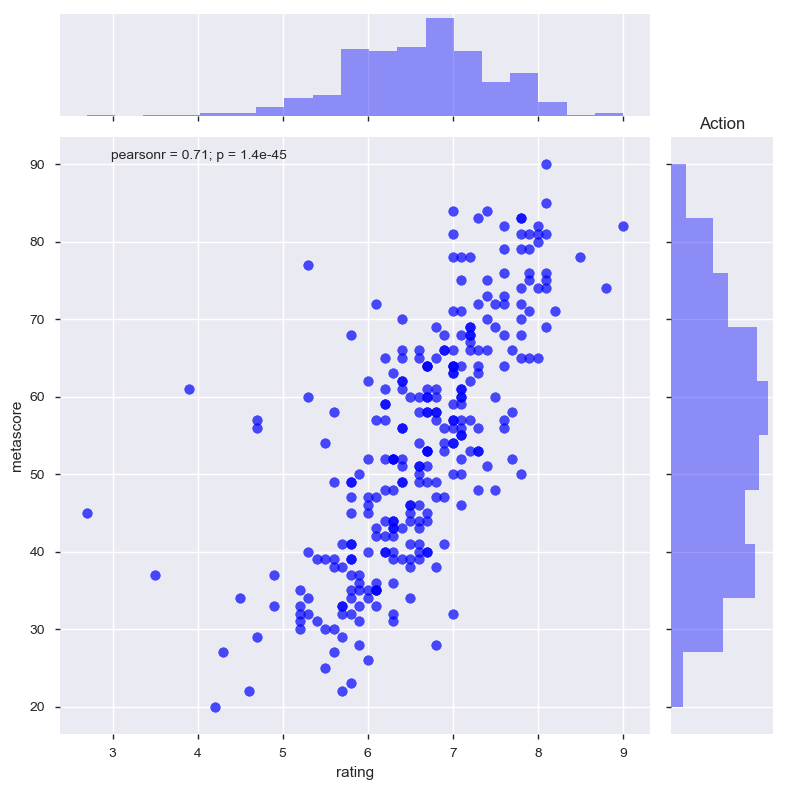

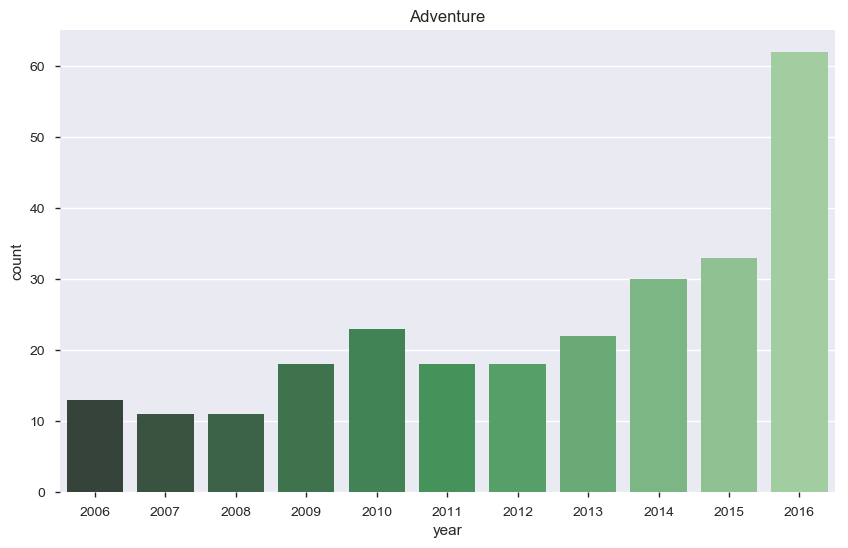

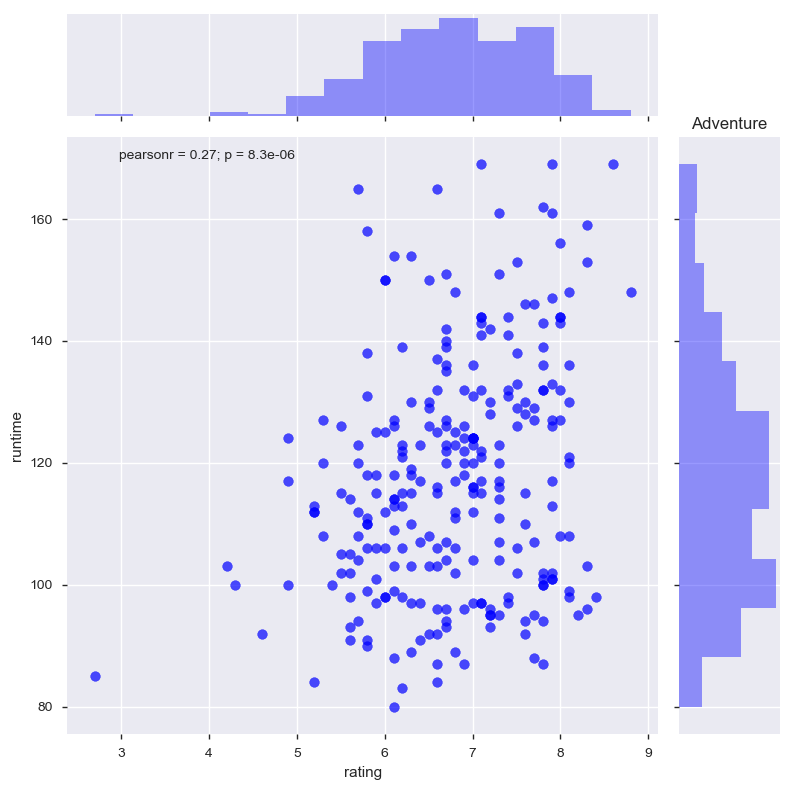

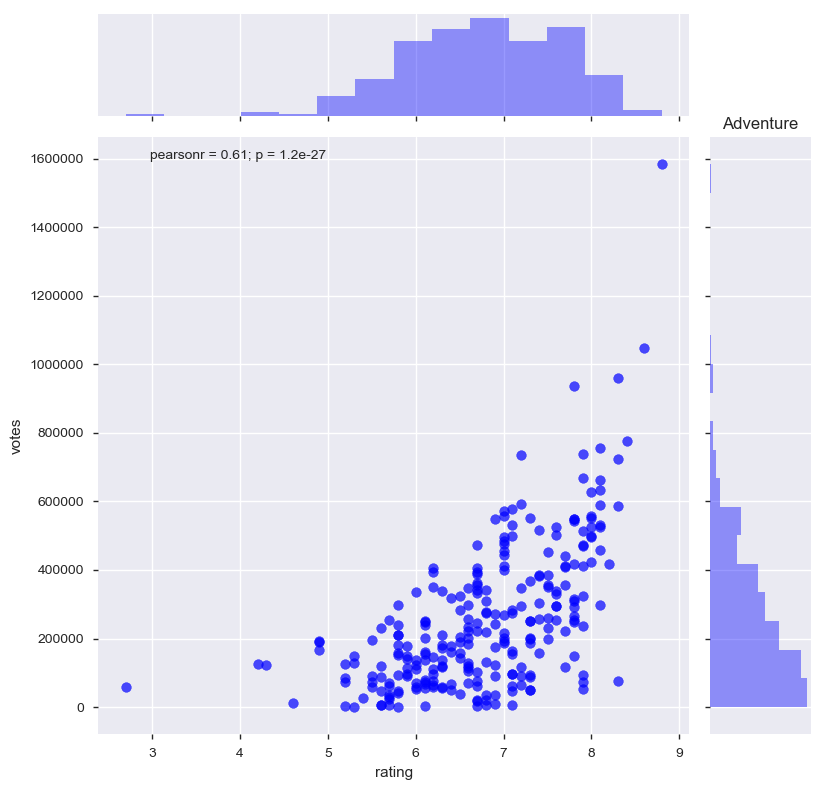

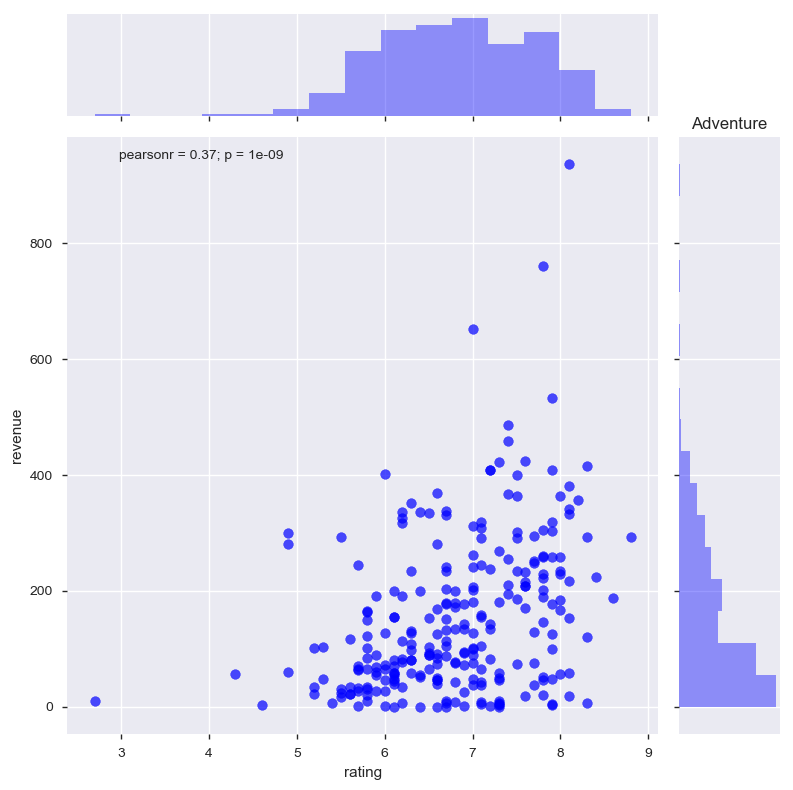

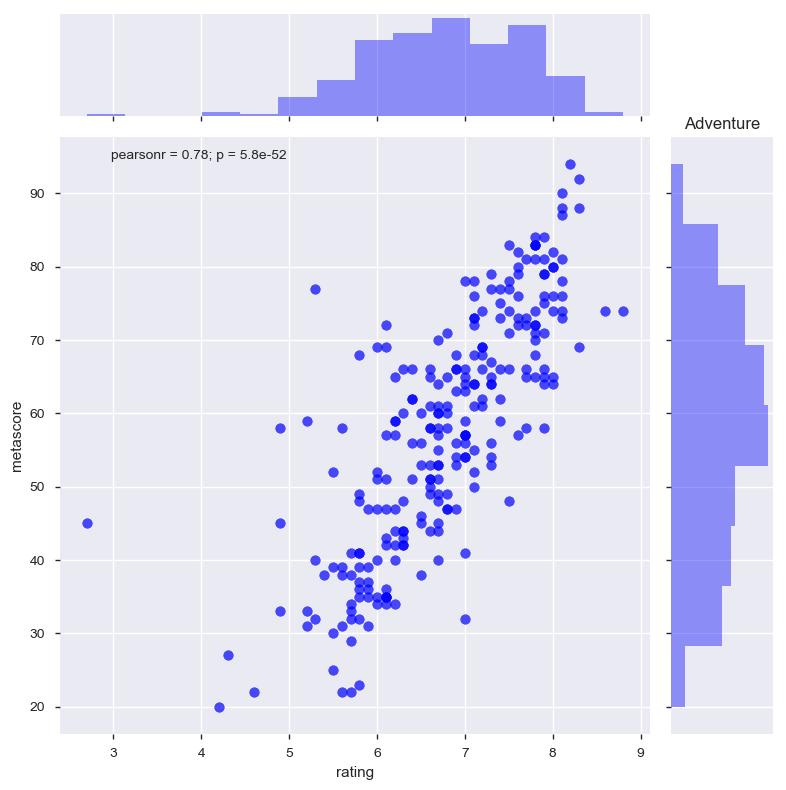

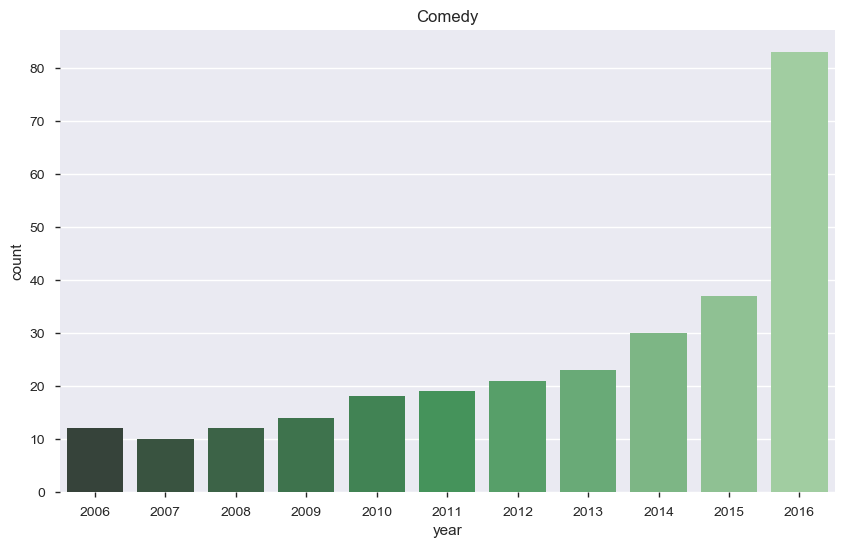

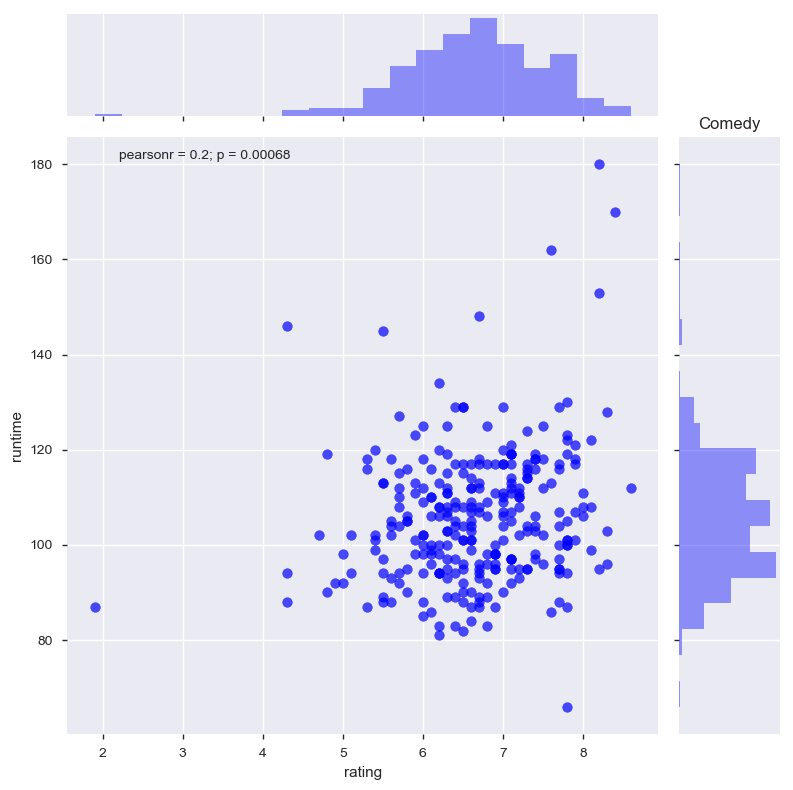

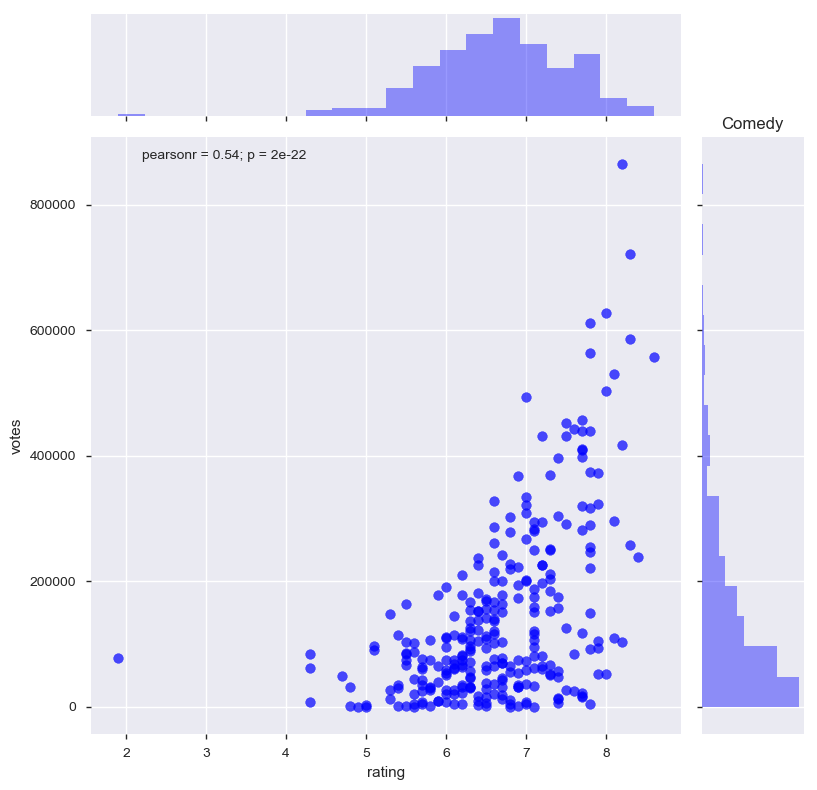

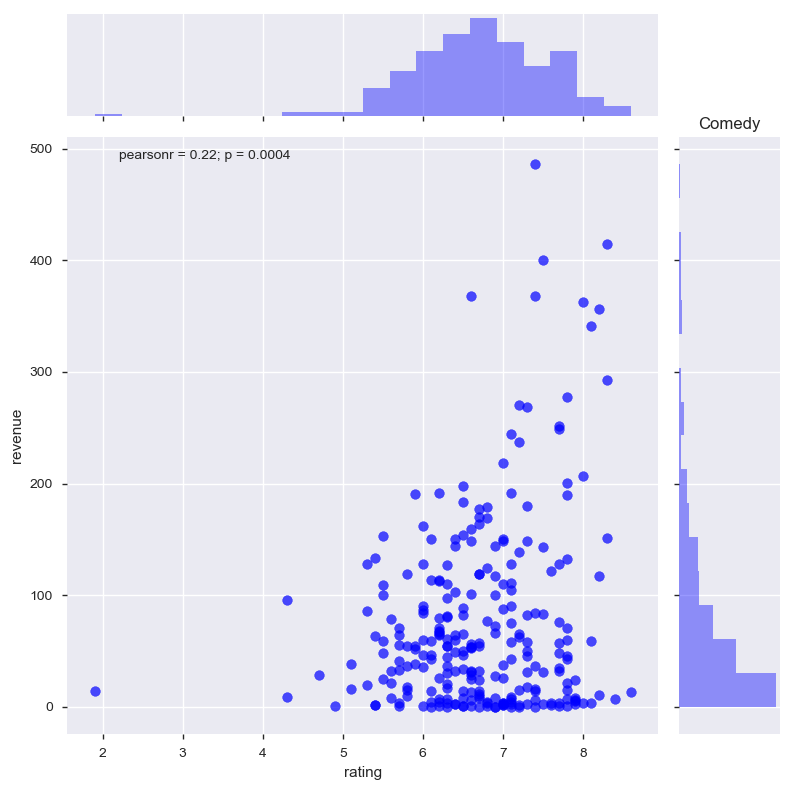

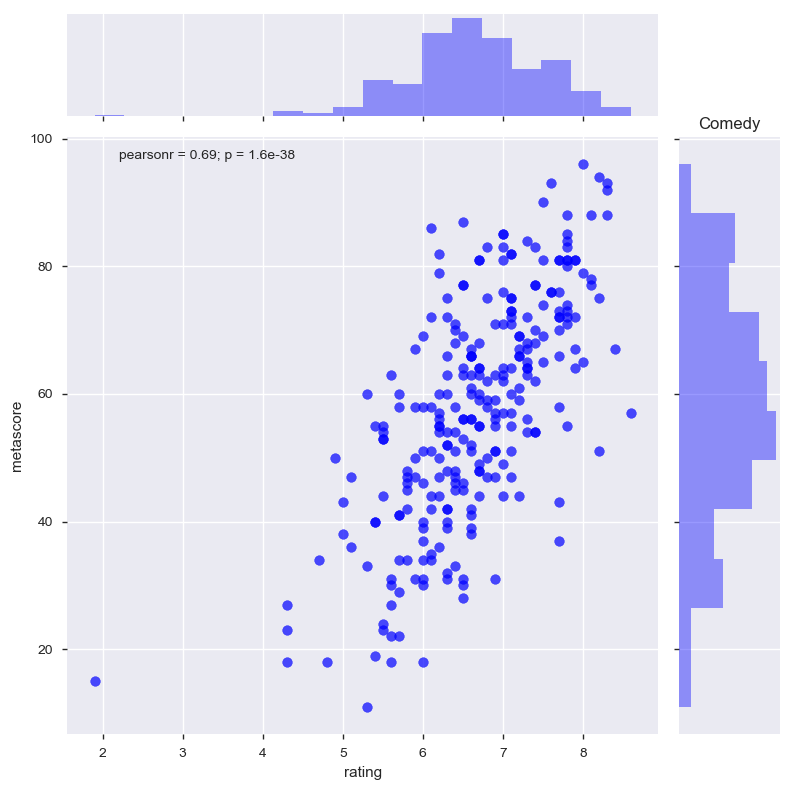

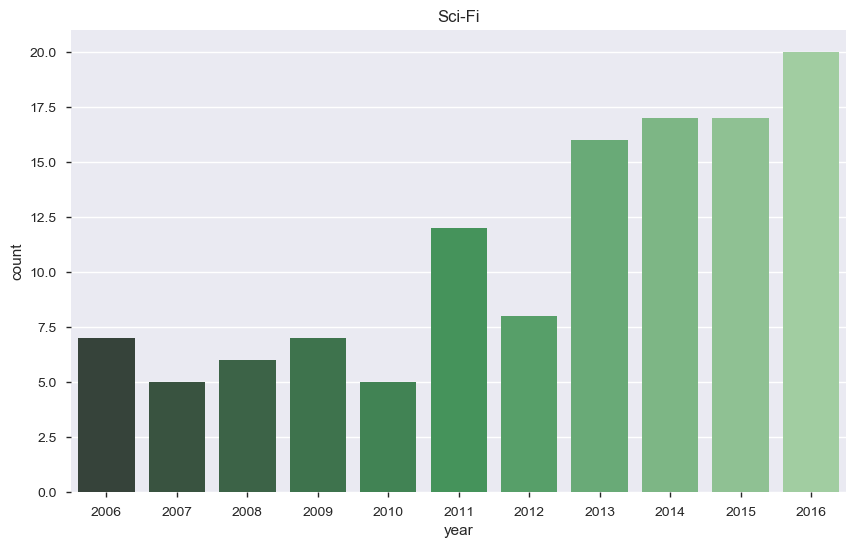

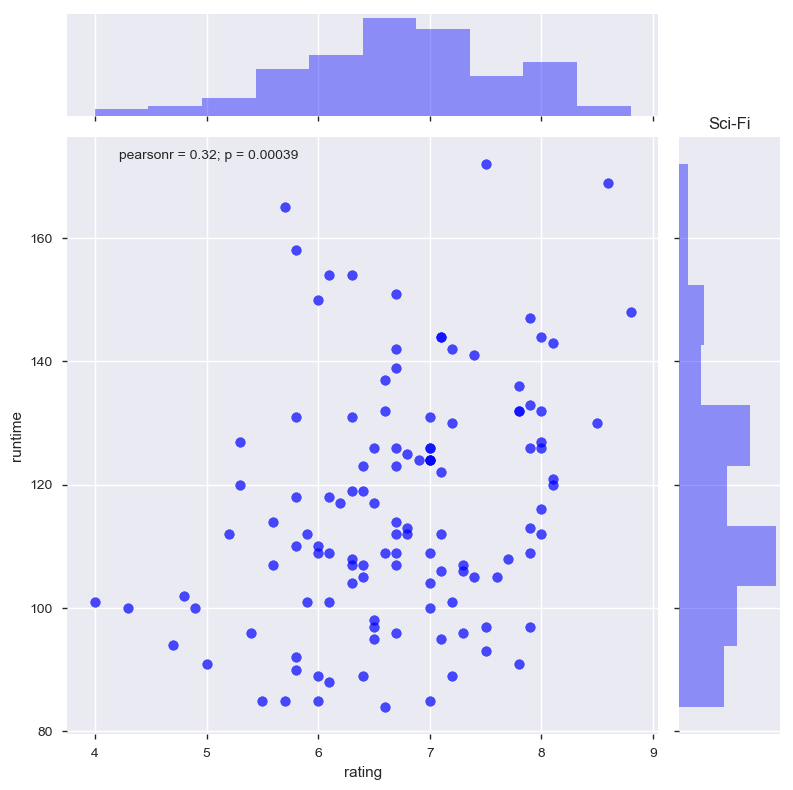

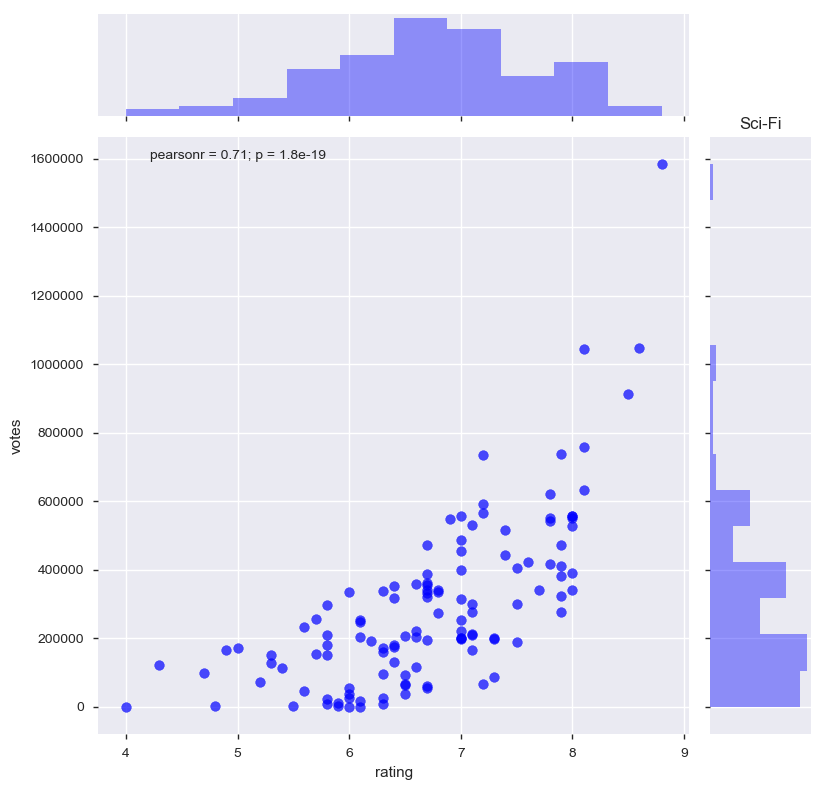

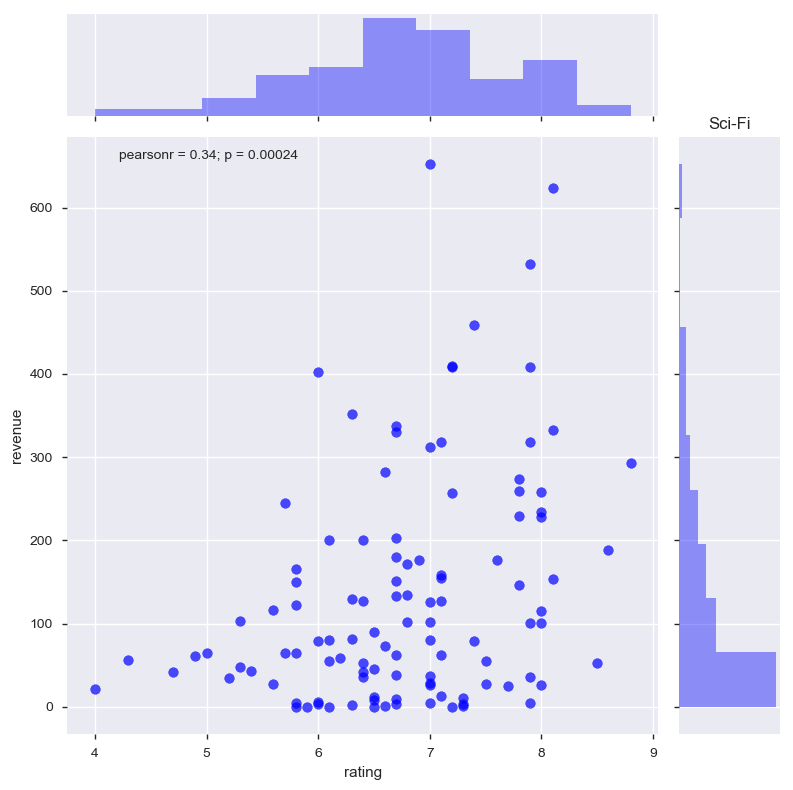

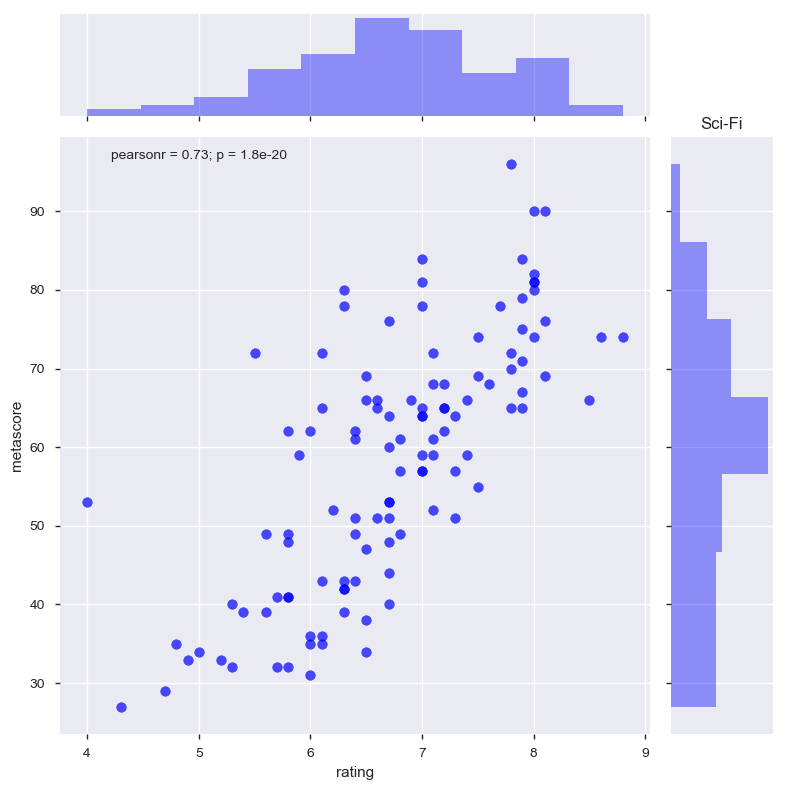

In [242]:
Top5Genres = ['Drama', 'Action', 'Adventure', 'Comedy', 'Sci-Fi']

for genre in Top5Genres:
    df = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='year', data=movies[df], palette="Greens_d");
    plt.title(genre)
    compare_movies_rating = ['runtime', 'votes','revenue', 'metascore']
    for compare in compare_movies_rating:
        sns.jointplot(x='rating', y=compare, data=movies[df], alpha=0.7, color='b', size=8)
        plt.title(genre)

### Observations

pearsonr Values
- Drama 
    - Rating vs. Runtime - 0.35
    - Rating vs. Votes - 0.5
    - Rating vs. Revenue - 0.1
    - Rating vs. Metascore - 0.55
- Action
    - Rating vs. Runtime - 0.41
    - Rating vs. Votes - 0.61
    - Rating vs. Revenue - 0.4
    - Rating vs. Metascore - 0.71
- Adventure
    - Rating vs. Runtime - 0.27
    - Rating vs. Votes - 0.61
    - Rating vs. Revenue - 0.37
    - Rating vs. Metascore - 0.78
- Comedy
    - Rating vs. Runtime - 0.2
    - Rating vs. Votes - 0.54
    - Rating vs. Revenue - 0.22
    - Rating vs. Metascore - 0.69
- Sci-Fi
    - Rating vs. Runtime - 0.32
    - Rating vs. Votes - 0.71
    - Rating vs. Revenue - 0.34
    - Rating vs. Metascore - 0.73


<a id=section506></a> 
### 5.6. Top Actors Movies wise

['Chris Pratt' 'Noomi Rapace' 'James McAvoy' ... ' Adam G. Sevani'
 'Shannon Woodward' 'Cheryl Hines']
2394
[3. 2. 5. ... 1. 1. 1.]


Text(0.5,1,'Total Movies - Top 5 Actors')

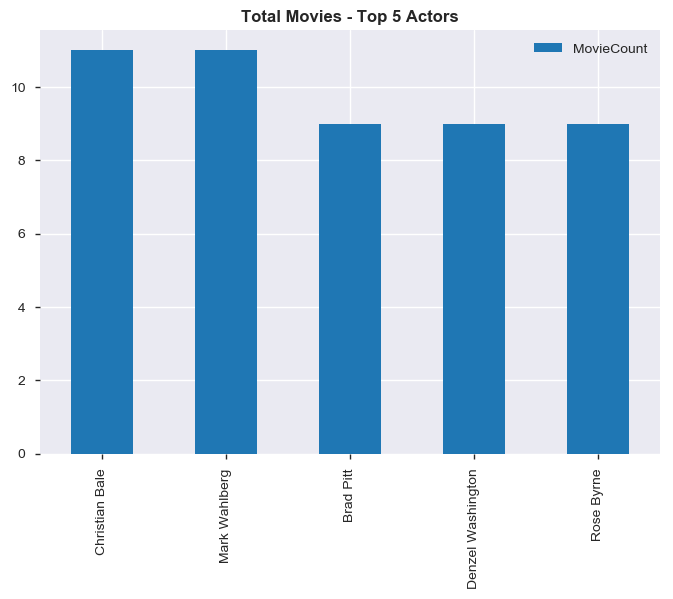

In [243]:
unique_actors = pd.concat([movies['actor_1'], movies['actor_2'], movies['actor_3'], movies['actor_4']]).unique()
unique_actors = unique_actors[unique_actors != None]
print (unique_actors)
print (len(unique_actors))

actor_movieCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
    current_actor = (movies['actor_1'] == actor) | (movies['actor_2'] == actor) | (movies['actor_3'] == actor) | (movies['actor_4'] == actor)
    #plt.figure()
    #plt.xlabel('Actor')
    #plt.ylabel('Number of Movies')
    #plt.title(str(actor))
    # movies[current_actor].year.value_counts().sort_index().plot.bar()
    # print(genre, len(movies[current_genre]))
    actor_movieCount[i] = len(movies[current_actor])
    i += 1
print (actor_movieCount)

actor_df = pd.DataFrame(actor_movieCount, index=unique_actors, columns=['MovieCount'])
actor_df.sort_values(by='MovieCount', ascending=False).head(5).plot.bar()
plt.ylabel('')
plt.title('Total Movies - Top 5 Actors', weight='bold')

<a id=section507></a> 
### 5.7. Lead Actors Revenue wise

[1243.07  126.46  442.21 ...    0.      0.      0.  ]


Text(0.5,1,'Revenue Collection - Top 5 Actors')

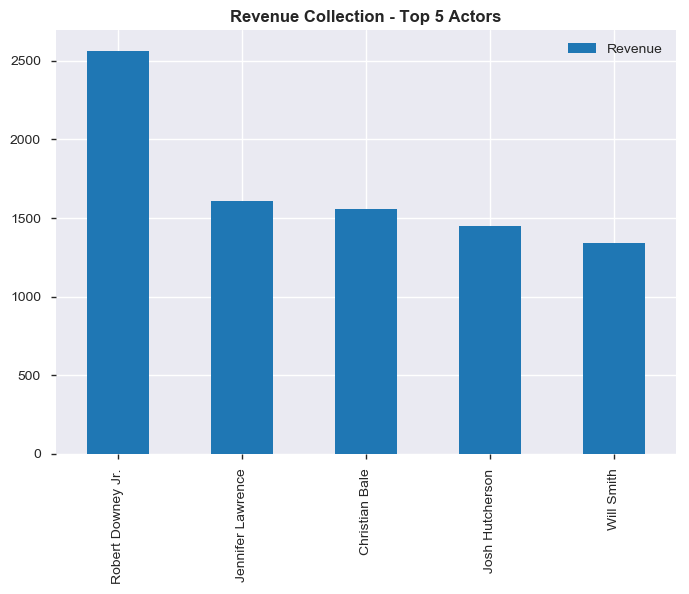

In [244]:
actor_RevenueCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
    current_actor = (movies['actor_1'] == actor)  | (movies['actor_2'] == actor)
    #plt.figure()
    #plt.xlabel('Actor')
    #plt.ylabel('Number of Movies')
    #plt.title(str(actor))
    # movies[current_actor].year.value_counts().sort_index().plot.bar()
    # print(genre, len(movies[current_genre]))
    actor_RevenueCount[i] = movies[current_actor].xs('revenue', axis=1).sum() 
    i += 1
print (actor_RevenueCount)

actor_revenue_df = pd.DataFrame(actor_RevenueCount, index=unique_actors, columns=['Revenue'])
actor_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar()
plt.ylabel('')
plt.title('Revenue Collection - Top 5 Actors', weight='bold')

### Observation
Iron Man is a clear-cut favorite as far as the box-office is concerned.

<a id=section506><a/>

<a id=section508></a> 
### 5.8. Ratings/Votes year wise

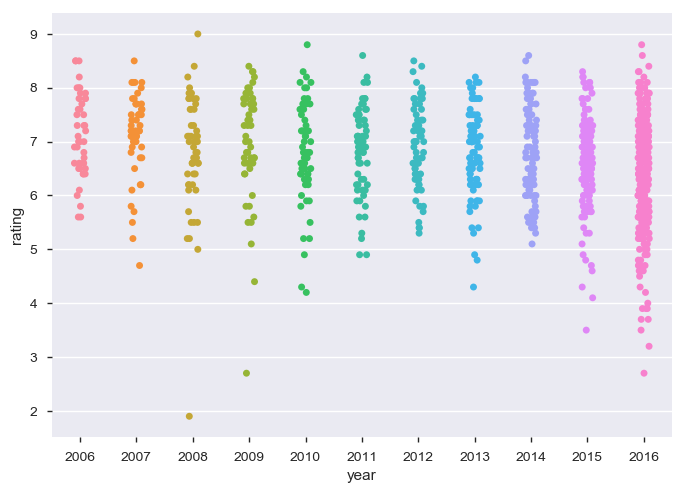

In [245]:
sns.stripplot(x="year", y="rating", data=movies, jitter=True)

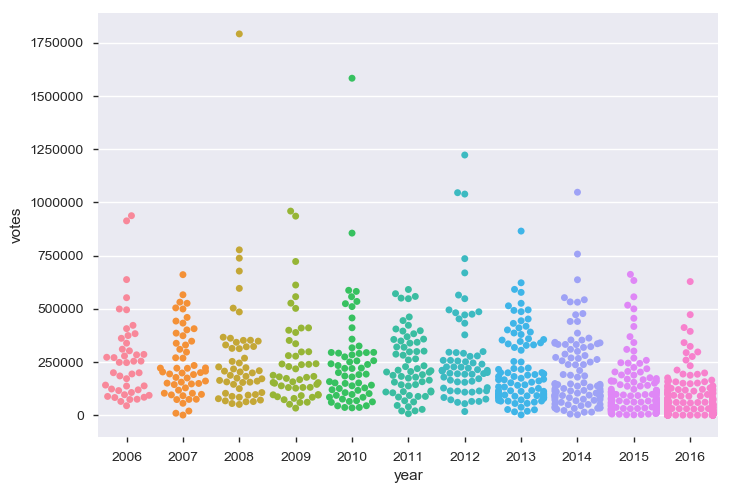

In [246]:
sns.swarmplot(x="year", y="votes", data=movies)

### Observation
The number of votes are increasing year on year.

<a id=section507><a/>

<a id=section509></a> 
### 5.9. Director vs. Movie Count

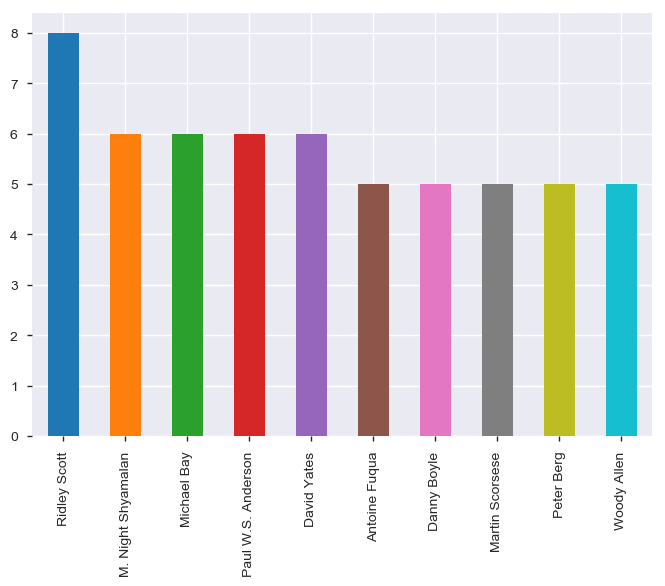

In [247]:
#print(movies.director.value_counts())
movies.director.value_counts()[:10].plot.bar(legend=False)

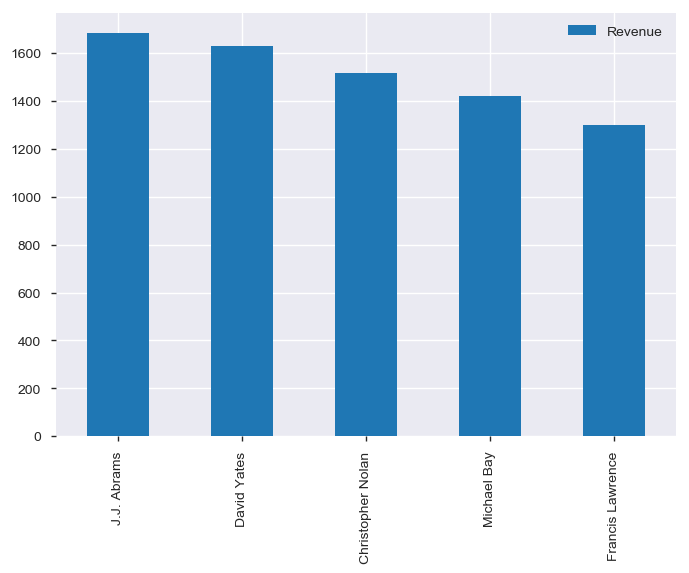

In [248]:
unique_directors = movies.director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_RevenueCount[i] = movies[current_director].xs('revenue', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['Revenue'])
director_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar()

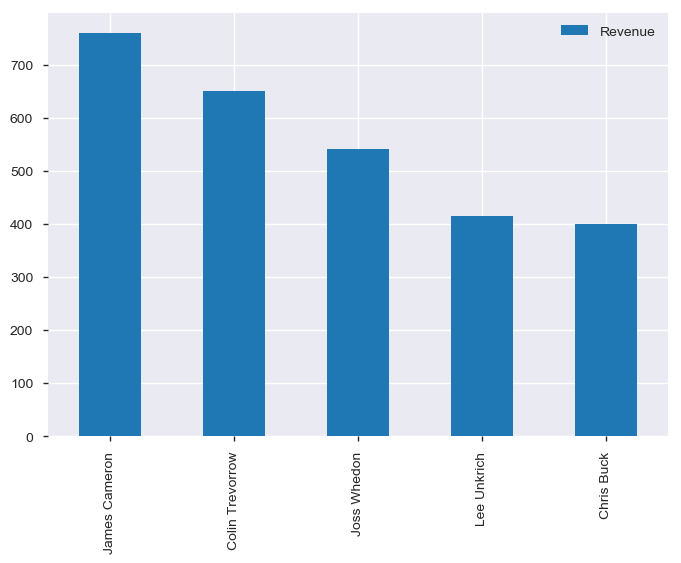

In [249]:
unique_directors = movies.director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_RevenueCount[i] = movies[current_director].xs('revenue', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['Revenue'])
director_revenue_df = director_revenue_df.apply(lambda x: x / movies.director.value_counts())   

director_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar()

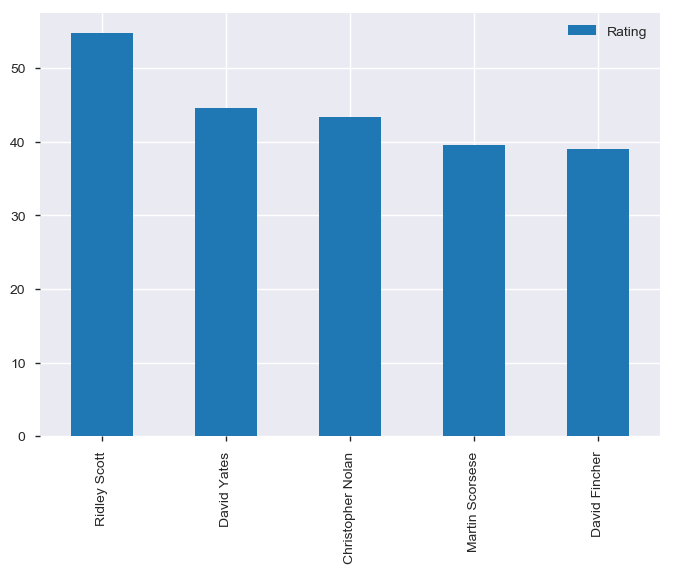

In [250]:
director_ratingCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_ratingCount[i] = movies[current_director].xs('rating', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_rating_df = pd.DataFrame(director_ratingCount, index=unique_directors, columns=['Rating'])
director_rating_df.sort_values(by='Rating', ascending=False).head(5).plot.bar()

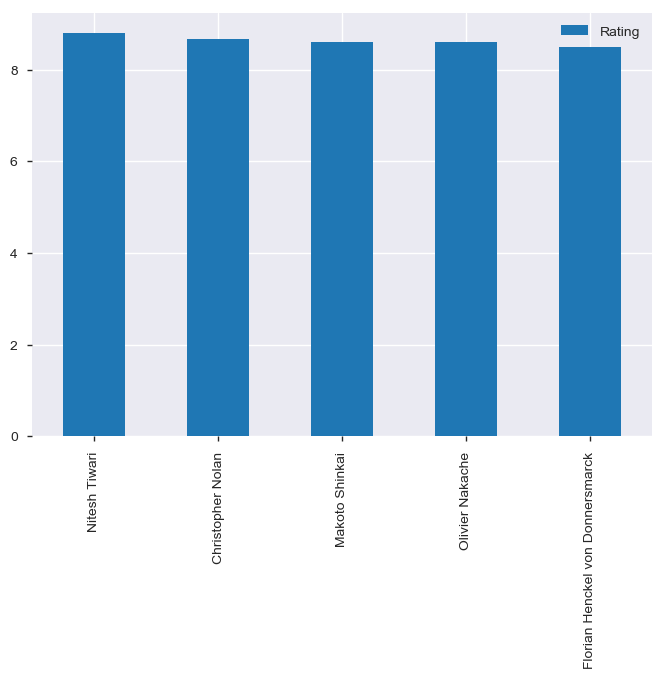

In [251]:
director_ratingCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_ratingCount[i] = movies[current_director].xs('rating', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_rating_df = pd.DataFrame(director_ratingCount, index=unique_directors, columns=['Rating'])
director_rating_df = director_rating_df.apply(lambda x: x / movies.director.value_counts())   
director_rating_df.sort_values(by='Rating', ascending=False).head(5).plot.bar()

<a id=section508><a/>

<a id=section510></a> 
### 5.10. Runtime vs. Rating

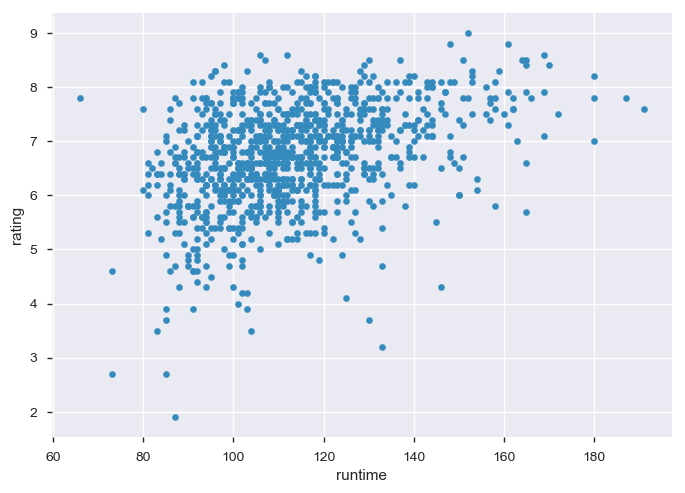

In [252]:
f = movies.sort_values(by='rating', ascending=False)
f.plot.scatter(x='runtime', y='rating')

### Observation
Majority of the films that have good rating (>6) have a runtime between 80 - 120 minutes.

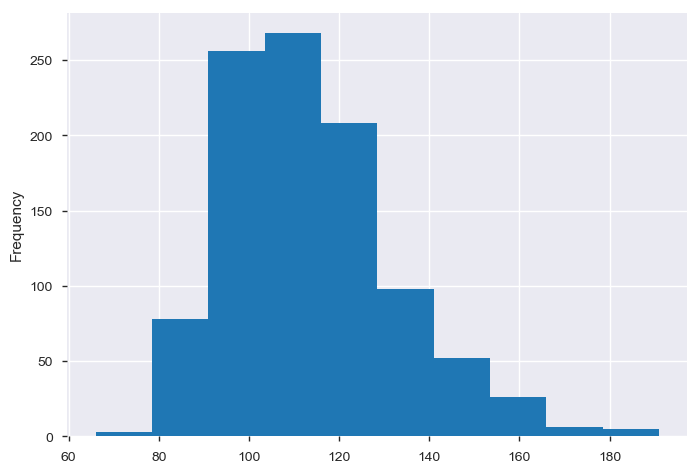

In [253]:
movies['runtime'].plot.hist()

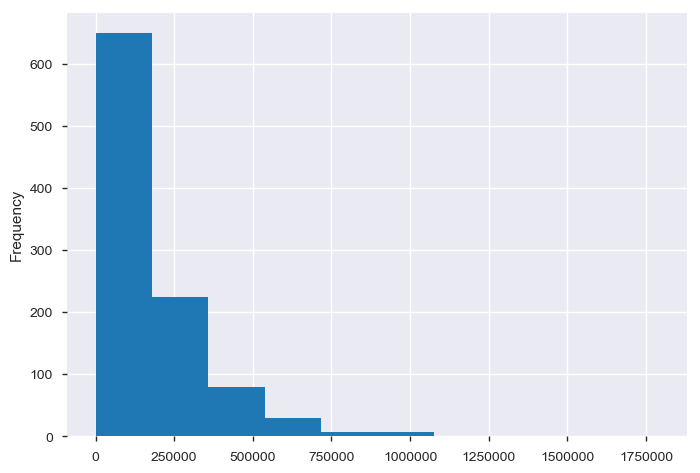

In [254]:
movies['votes'].plot.hist()

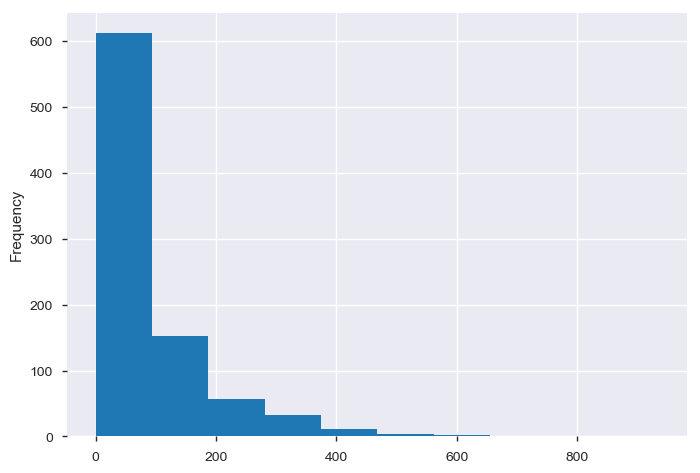

In [255]:
movies['revenue'].plot.hist()

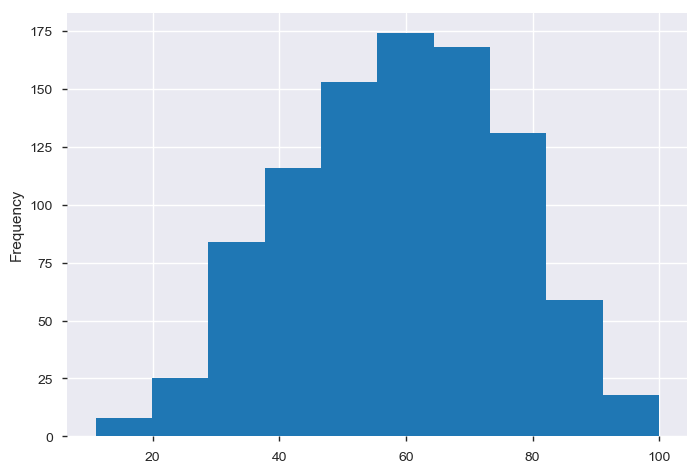

In [256]:
movies['metascore'].plot.hist()

<a id=section509><a/>

<a id=section6></a>
### 6. Analysis through questions

<a id=section601><a/>

### 6.1. What are the top ten movies?


<a id=section602><a/>

#### 6.1.1. In terms of revenue

In [257]:
movies.sort_values(by='revenue', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

,title,director,revenue,rating,genre_1
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63,8.1,Action
87,Avatar,James Cameron,760.51,7.8,Action
85,Jurassic World,Colin Trevorrow,652.18,7.0,Action
76,The Avengers,Joss Whedon,623.28,8.1,Action
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
12,Rogue One,Gareth Edwards,532.17,7.9,Action
119,Finding Dory,Andrew Stanton,486.29,7.4,Animation
94,Avengers: Age of Ultron,Joss Whedon,458.99,7.4,Action
124,The Dark Knight Rises,Christopher Nolan,448.13,8.5,Action
578,The Hunger Games: Catching Fire,Francis Lawrence,424.65,7.6,Action


<a id=section603><a/>

#### 6.1.2. In terms of rating

In [258]:
movies.sort_values(by='rating', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

,title,director,revenue,rating,genre_1
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
80,Inception,Christopher Nolan,292.57,8.8,Action
117,Dangal,Nitesh Tiwari,11.15,8.8,Action
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure
96,Kimi no na wa,Makoto Shinkai,4.68,8.6,Animation
249,The Intouchables,Olivier Nakache,13.18,8.6,Biography
133,Whiplash,Damien Chazelle,13.09,8.5,Drama
64,The Prestige,Christopher Nolan,53.08,8.5,Drama
99,The Departed,Martin Scorsese,132.37,8.5,Crime
991,Taare Zameen Par,Aamir Khan,1.20,8.5,Drama


<a id=section604><a/>

#### 6.1.3 In terms of votes cast

In [259]:
movies.sort_values(by='votes', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

,title,director,revenue,rating,genre_1
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
80,Inception,Christopher Nolan,292.57,8.8,Action
124,The Dark Knight Rises,Christopher Nolan,448.13,8.5,Action
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure
76,The Avengers,Joss Whedon,623.28,8.1,Action
144,Django Unchained,Quentin Tarantino,162.80,8.4,Drama
77,Inglourious Basterds,Quentin Tarantino,120.52,8.3,Adventure
99,The Departed,Martin Scorsese,132.37,8.5,Crime
87,Avatar,James Cameron,760.51,7.8,Action
64,The Prestige,Christopher Nolan,53.08,8.5,Drama


<a id=section605><a/>

#### 6.1.4. What was the most successfull genre?

In [260]:
print ("Rating")
print (movies.sort_values(by='rating', ascending=False).head(10)['genre_1'].value_counts())
print ("Revenue")
print (movies.sort_values(by='revenue', ascending=False).head(10)['genre_1'].value_counts())
print ("Votes")
print (movies.sort_values(by='votes', ascending=False).head(10)['genre_1'].value_counts())

Rating
Action       3
Drama        3
Crime        1
Adventure    1
Biography    1
Animation    1
Name: genre_1, dtype: int64
Revenue
Action       9
Animation    1
Name: genre_1, dtype: int64
Votes
Action       5
Drama        2
Adventure    2
Crime        1
Name: genre_1, dtype: int64


<a id=section606><a/>

#### 6.1.5. What movies have low rating but high revenue?

In [261]:
movies.sort_values(by='revenue', ascending=False).head(20)[['title','director', 'revenue', 'rating', 'genre_1']][movies['rating'] < 6]

,title,director,revenue,rating,genre_1


None

<a id=section607><a/>

#### 6.1.6. What movies have high rating but failed to collect revenue?

In [262]:
movies.sort_values(by='rating', ascending=False).head(50)[['title','director', 'revenue', 'rating', 'genre_1']][movies['revenue'] < movies['revenue'].mean()]

,title,director,revenue,rating,genre_1
117,Dangal,Nitesh Tiwari,11.15,8.8,Action
96,Kimi no na wa,Makoto Shinkai,4.68,8.6,Animation
249,The Intouchables,Olivier Nakache,13.18,8.6,Biography
133,Whiplash,Damien Chazelle,13.09,8.5,Drama
64,The Prestige,Christopher Nolan,53.08,8.5,Drama
991,Taare Zameen Par,Aamir Khan,1.20,8.5,Drama
476,The Lives of Others,Florian Henckel von Donnersmarck,11.28,8.5,Drama
430,3 Idiots,Rajkumar Hirani,6.52,8.4,Comedy
455,Jagten,Thomas Vinterberg,0.61,8.3,Drama
26,Bahubali: The Beginning,S.S. Rajamouli,6.50,8.3,Action


<a id=section608></a> 
### 6.2. What is the trend of rating, revenue and runtime over years?



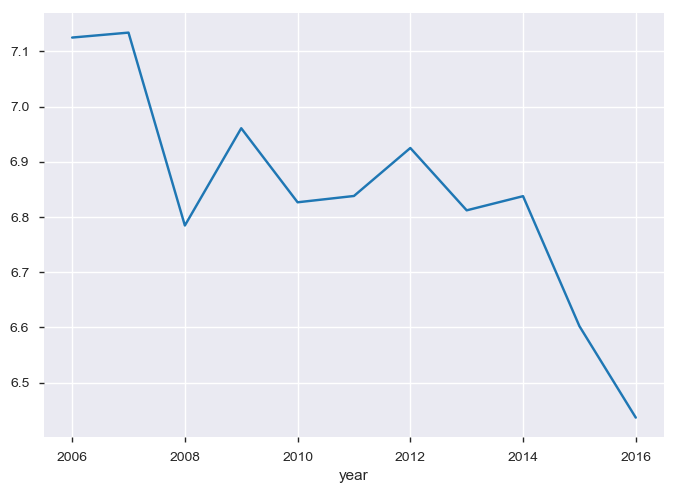

In [263]:
yearMov = movies.groupby('year')
yearMov.mean()['rating'].plot.line()


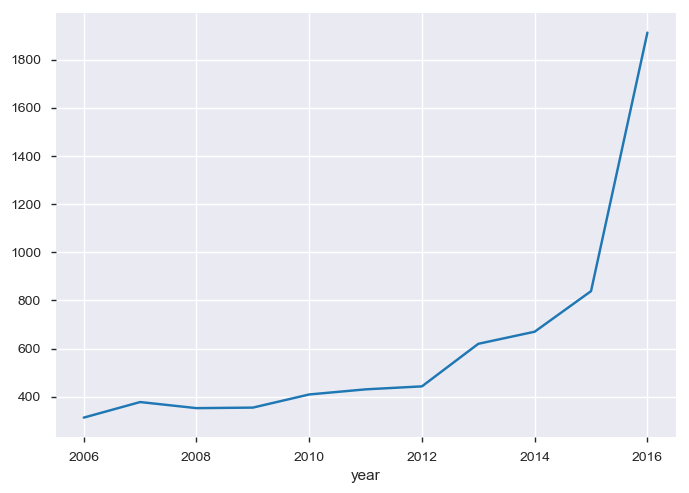

In [264]:
yearMov.sum()['rating'].plot.line()

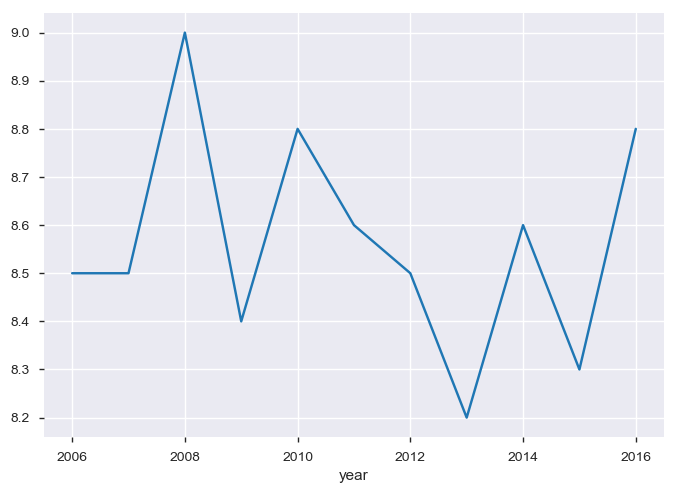

In [265]:
yearMov['rating'].max().plot.line()


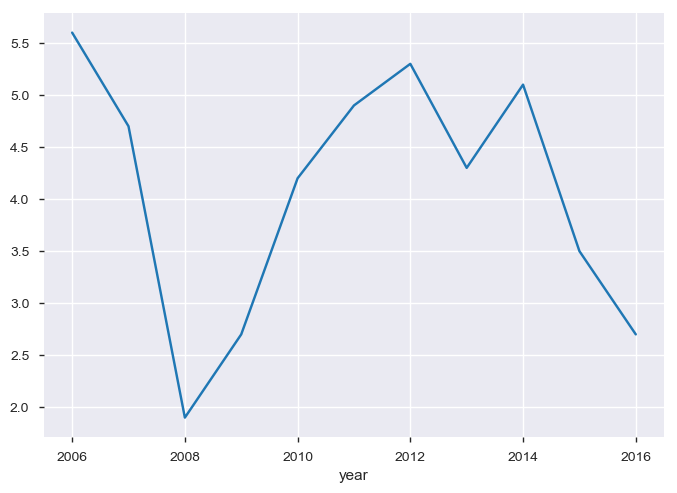

In [266]:
yearMov['rating'].min().plot.line()


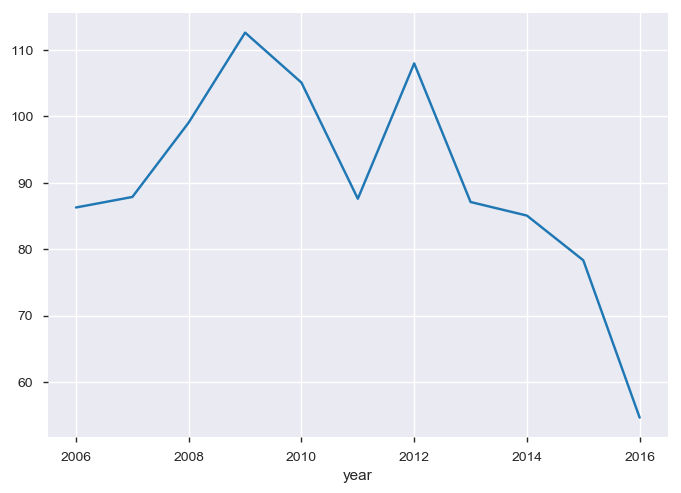

In [267]:
yearMov.mean()['revenue'].plot.line()


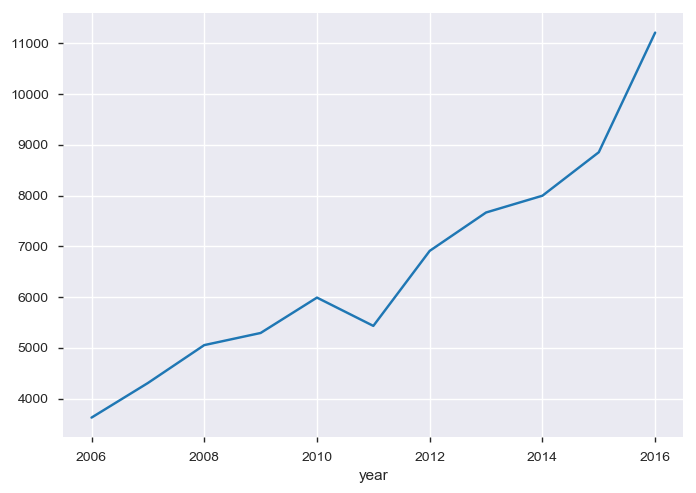

In [268]:
yearMov.sum()['revenue'].plot.line()


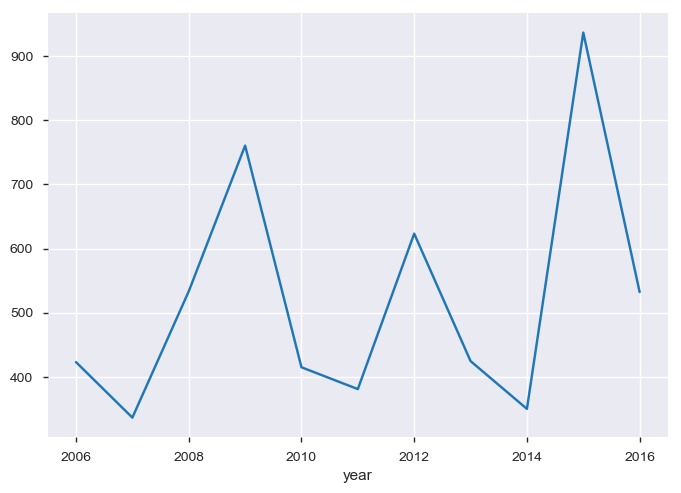

In [269]:
yearMov['revenue'].max().plot.line()


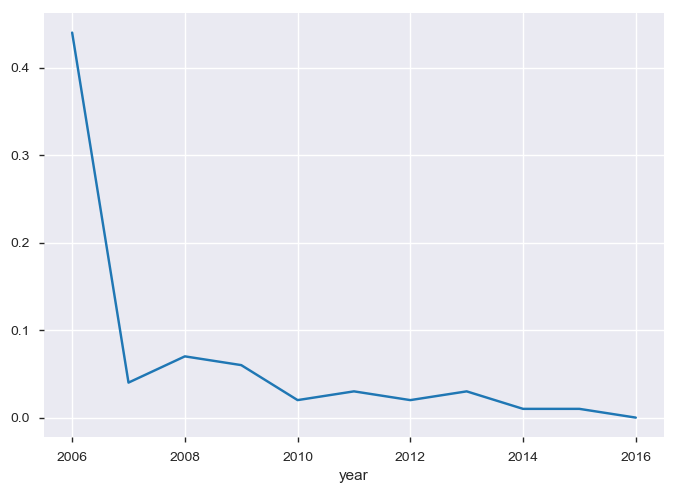

In [270]:
yearMov['revenue'].min().plot.line()


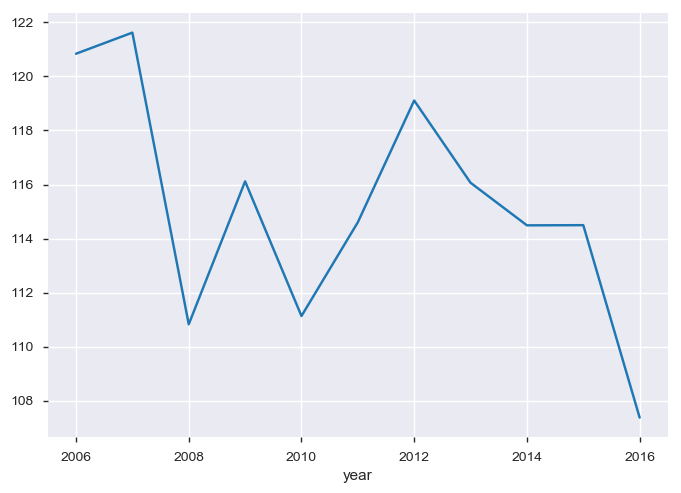

In [271]:
yearMov['runtime'].mean().plot.line()


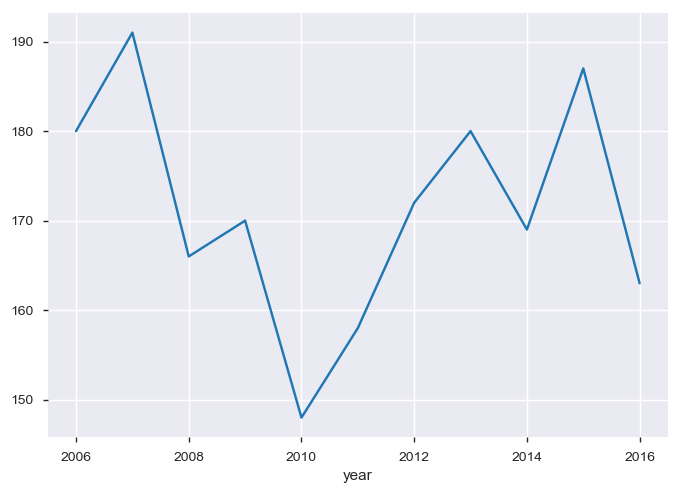

In [272]:
yearMov['runtime'].max().plot.line()


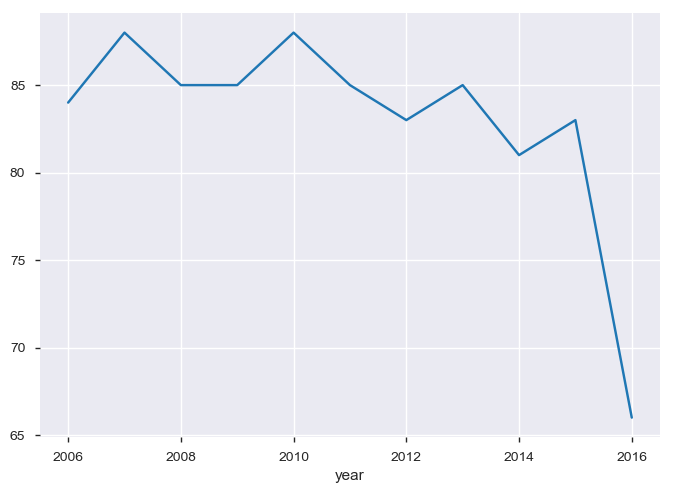

In [273]:
yearMov['runtime'].min().plot.line()


<a id=section7></a> 

### Conclusion

- The data set gives us insights about the 1000 movies released in between 2006 - 2016.
    - The movies are spread across 20 different Genres. (Section 4.4)
        - Adventure and Action movies are having a good market at the box office followed by Drama, Comedy and Sci-Fi movies.
        - But the highest number of movies were made in the Drama genre followed by action and comedy.
        - The least favorite genres are Musical, Western and War.
        - As the number of movies made in these genres are less, their collections are also correspondinglylow.
        - Drama movies are rated much higher compared to any other Genres. 
    - The number of movies almost doubled from 2015 to 2016. Till 2013, the number of movies made was around 50 but the trend started changing from 2013. (Section 5.1)
    - Rating and metascore are highly correlated wheread Revenue and Rating have low correlation.  (Section 5.2)
    - Majority of the movies have rating between 6 - 8 (Average good movies)(Section 5.4)
    - The best movie in terms of rating and votes cast is "The Dark Knight" whereas in terms of revenue, it is "Star Wars: Episode VII - The Force Awakens". (Section 6.1)
    - The lead actor who succeeded at the box office is "Robert Downey Junior" and in terms of number of movies it is "Christian Bale" (Section 5.7)
    - The person to direct more number of movies in this period is "Ridley Scott" but the one to understand the pulse of the audience is "J.J. Abrams" with more collections. (Section 5.9)
    - The directors with high success ratio are Nitesh Tiwari followed by Christopher Nolan. (Section 5.9)
    - Movies taken in Action genre were successful in all the three categories - rating, votes and revenue. (Overall)
    - Of the top 50 highly rated movies, 25 (50%) of them reported very low revenues. Mostly in the drama genre. (Section 6.1). Another interesting fact about these movies is that they contain the Indian movies.
    - Majority of the films that have good rating (>6) have a runtime between 80 - 120 minutes. (Section 5.10)
    
    - Trend over the years (From section 6.2)
        - The average rating is declining over the years but as the number of movies are more in number the total rating per year is increasing.
        - The average revenue is also on the declining probably owing to the drama movies but the overall box office collections are increasing year on year.
        - The average runtime of movies are on the declining trend (from 120 min to 106 min)
- More people are going to the cinemas after 2013 than before and they are preferring short movies packed with adventure, action rather than drama.
- The average revenue per movie is decreasing though the overall collections are on the rise.
- High revenue collection movies have high ratings but the vice-versa is not true. That is highly rated or crtically acclaimed movies failed to collect money.
    
    
